In [1]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/2NSRC/InternalReport/Figures/PseudoData/'

# In this notebook we use Pseudo-Data that was passed through the CLAS acceptance map
to check the validity of our method

In [6]:
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ'] 
generated,accepted = dict() , dict() 
ana_sim,reco_pars = dict(),dict()
target = 'C12'
SigmaT = 0.143
SigmaZ = 0.150
for meanZ in [0.105,0.110,0.130]:
    run_name = 'run5_'+target+'_SigmaT%.3f'%SigmaT+'_SigmaZ%.3f'%SigmaZ+'_MeanZ%.3f'%meanZ
    name = 'SigmaT=%.3f SigmaZ=%.3f MeanZ=%.3f'%(SigmaT,SigmaZ,meanZ)
    generated[name] = read_root('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/eg_rootfiles/'+run_name+'.root',key='genTree',columns=columns)
    accepted[name] = read_root('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/eg_rootfiles/'+run_name+'.root',key='anaTree',columns=columns)
    ana_sim[name] = TAnalysisEG2('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/eg_rootfiles/', run_name )
    reco_pars[name] = calc_cm_pars_sigma( ana_sim[name] )



In [7]:
# Oct-24, 2017
def calc_cm_pars_sigma( fana , pMiss_max = 0.6 , debug=0 ):
#    Return: pd.DataFrame ({mean_x , sigma_x ,mean_y , sigma_y , mean_z , sigma_z})
    df_result = pd.DataFrame()
    if fana.GetEntries()==0:#{
        print 'no entries in anaTree of',fana.GetFileName()
        print 'leaving calc_cm_parameters'
        return pd.DataFrame() , False
    #}    
    ana = read_root( str(fana.GetFileName()) , key='anaTree' , columns=['pcmX','pcmY','pcmZ','Pmiss3Mag','rooWeight']  )
    unweighted = fana.FastRooFitCM_1bin( 0.3 , pMiss_max )
    df_result = pd.DataFrame({'Nevts':len(ana)
                             ,'mean_x_unweighted':unweighted[0],'mean_xErr_unweighted':unweighted[1],'sigma_x_unweighted':unweighted[2],'sigma_xErr_unweighted':unweighted[3]
                             ,'mean_y_unweighted':unweighted[4],'mean_yErr_unweighted':unweighted[5],'sigma_y_unweighted':unweighted[6],'sigma_yErr_unweighted':unweighted[7]
                             ,'mean_z_unweighted':unweighted[8],'mean_zErr_unweighted':unweighted[9],'sigma_z_unweighted':unweighted[10],'sigma_zErr_unweighted':unweighted[11]
                             ,'chi2red_x_unweighted':unweighted[12],'ndof_x_unweighted':unweighted[13]
                             ,'chi2red_y_unweighted':unweighted[14],'ndof_y_unweighted':unweighted[15]
                             ,'chi2red_z_unweighted':unweighted[16],'ndof_z_unweighted':unweighted[17]
                             ,'minNLogLikelihood_x_unweighted':unweighted[18],'minNLogLikelihood_y_unweighted':unweighted[19],'minNLogLikelihood_z_unweighted':unweighted[20]
                         }
                         , index=[0])
    if debug: print "calculated cm parameters for " + fana.InFileName
    garbage_list = [ ana ]
    del garbage_list
    return df_result
# ------------------------------------------------------------------------------- #

In [10]:
name = 'SigmaT=0.143 SigmaZ=0.150 MeanZ=0.110'
print 'name:',name
reco_pars[name]

name: SigmaT=0.143 SigmaZ=0.150 MeanZ=0.110


,Nevts,chi2red_x_unweighted,chi2red_y_unweighted,chi2red_z_unweighted,mean_xErr_unweighted,mean_x_unweighted,mean_yErr_unweighted,mean_y_unweighted,mean_zErr_unweighted,mean_z_unweighted,...,minNLogLikelihood_z_unweighted,ndof_x_unweighted,ndof_y_unweighted,ndof_z_unweighted,sigma_xErr_unweighted,sigma_x_unweighted,sigma_yErr_unweighted,sigma_y_unweighted,sigma_zErr_unweighted,sigma_z_unweighted
0,266,0.449436,0.803865,0.592426,0.009981,0.005656,0.009538,0.015357,0.007186,0.013257,...,-192.803172,264.0,264.0,264.0,0.007055,0.1628,0.006743,0.155563,0.005081,0.117211


saved figure to  /Users/erezcohen/Desktop/Projects/2NSRC/InternalReport/Figures/PseudoData/PseudoDataGenRec_run5_C_SigmaT0.143_SigmaZ0.150_MeanZ0.130.pdf


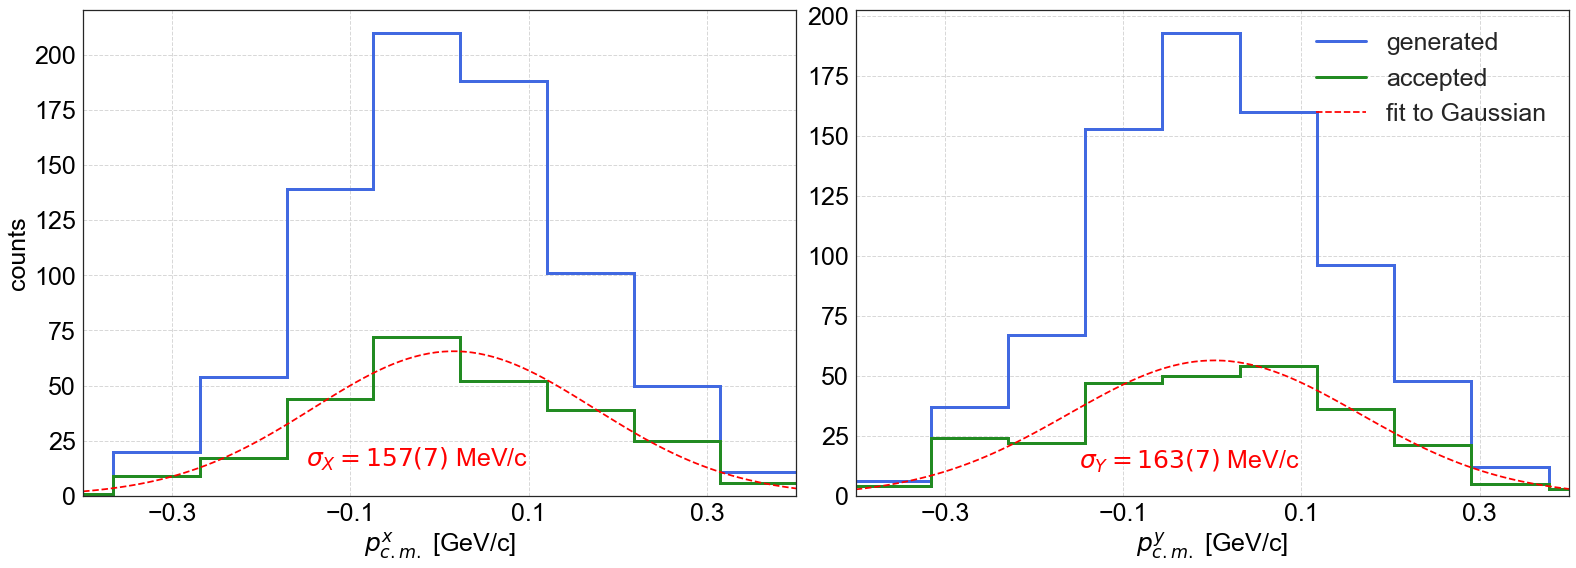

In [26]:
MeanZ=0.110
name = 'SigmaT=0.143 SigmaZ=0.150 MeanZ=%.3f'%MeanZ
run_name = 'run5_'+target+'_SigmaT%.3f'%0.143+'_SigmaZ%.3f'%0.150+'_MeanZ%.3f'%MeanZ

fig = plt.figure(figsize=(22,8))
for i_dir,(direction,dir_name) in enumerate(zip(['X','Y'],['x','y'])):
    ax = fig.add_subplot(1,2,i_dir+1)
    for sample,label,color in zip([generated[name],accepted[name]]
                                  ,['generated','accepted']
                                  ,['royalblue','forestgreen']):
        Pcm_t = sample['pcm'+direction]
        h,bins,_ = plt.hist(Pcm_t,histtype='step',linewidth=3,color=color);
        plt.plot([0,0],[0,0],color=color,linewidth=3,label=label)

        # add Gaussian of accepted events
        mu = float(reco_pars[name]['mean_'+dir_name+'_unweighted']) 
        sigma = float(reco_pars[name]['sigma_'+dir_name+'_unweighted'])
        sigma_err = float(reco_pars[name]['sigma_'+dir_name+'Err_unweighted'])

        x_gauss = np.linspace(-0.4,0.4,100)
        norm_fact = len(Pcm_t)*(bins[1]-bins[0])
        y_gauss = norm_fact*mlab.normpdf(x_gauss, mu, sigma)
        if label=='accepted': 
            plt.plot(x_gauss,y_gauss,'--',color='red',label='fit to Gaussian')        
            plt.text( -0.15, 0.2*np.max(y_gauss),r'$\sigma_{%s}=%.0f(%.0f)$ MeV/c'%(direction , 1000*sigma , 1000*sigma_err),color='red',fontsize=25)


    set_axes(ax,r'$p_{c.m.}^{%s}$ [GeV/c]'%dir_name,'counts' if i_dir==0 else ''
             ,xlim=(-0.4,0.4)
             ,xticks=[-0.3,-0.1,0.1,0.3]
             ,do_add_legend=True if i_dir>0 else ''
             ,do_add_grid=True)
plt.tight_layout()
print 'saved figure to ',figures_path+'PseudoDataGenRec'+'_'+run_name+'.pdf'
plt.savefig(figures_path+'PseudoDataGenRec'+'_'+run_name+'.pdf')

# compare with the results from our method
what happens when we apply *'acceptance correction'* to the pseudo-data that passed through CLAS

In [13]:

ColleCalc = pd.DataFrame({'A':[4,12 , 27 , 56 , 208],
                        'allpairs':[110,141,146,147.5,145.5],# average of HO and WS
                        'nl00':[110,157,166,173.,177.5]},# average of HO and WS
                         index = ['$^{4}$He','$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
CiofiCalc = pd.DataFrame({'A':[4 , 12 , 40 , 56 , 208], # 3 , 
                        's_t':[90 , 138.6174 , 142.6555 , 132.5117 , 151.3311]}, # 0.0724
                         index = ['$^{4}$He','$^{12}$C','$^{40}$Ca','$^{56}$Fe','$^{208}$Pb']) # '$^{3}$He',
MonizCalc = pd.DataFrame({'A':[12 , 40 , 208],
                        '3kF/4':[165.8 , 188.3 , 198.8]},
                         index = ['$^{12}$C','$^{40}$Ca','$^{208}$Pb'])
BNL_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.143],'sigma_t_final_Err':[0.017]},index = ['$^{12}$C'])
HallA_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.136],'sigma_t_final_Err':[0.020]},index = ['$^{12}$C'])
Korover_Data = pd.DataFrame({'A':[4],'sigma_t_final':[0.100],'sigma_t_final_Err':[0.020]},index = ['$^{4}$He'])
WI_Data = pd.DataFrame({'A':[ 12 , 27 , 56 , 208], 
                        'sigma_t_final':[0.158 , 0.156 , 0.181 , 0.174], 
                        'sigma_t_final_Err':[0.012 , 0.019 , 0.011 , 0.016]}, 
                         index = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']) 

def plot_data(data , ax=None, direction='t', Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None , facecolors=None ):
    ax.errorbar((data['A']+Ashift), 
                y=1000*data['sigma_'+direction+'_final'],
                yerr=1000*data['sigma_'+direction+'_final_Err'],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth
                , fmt=fmt,label=label)

def plot_data_assymetric(data , unc_name='tot', ax=None, direction='t', Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, capthick=0, capsize=5,
                       vary=None , varyerr=None , label=None , facecolors=None ):
    ax.errorbar((data['A']+Ashift), 
                y=1000*data['sigma_'+direction+'_final'],
                yerr=[1000*data['sigma_'+direction+'_final_dw_err_'+unc_name],1000*data['sigma_'+direction+'_final_up_err_'+unc_name]],
                color=color, marker=marker,markersize=markersize,linewidth=linewidth,capthick=capthick,capsize=capsize,
                fmt=fmt,label=label)        
    
def plot_calculation_line( data , varx='A',kind='nearest' , vary=None , color='blue' ,linestyle='--', label=None, linewidth=4):
    from scipy.interpolate import interp1d
    x = data[varx]
    y = data[vary]
    itp = interp1d(x,y, kind='linear')
    if kind is None:
        f = interp1d( x , y )
    else:
        f = interp1d( x , y ,kind=kind)
    window_size, poly_order = 101, 4
    xnew = np.linspace(x.min(),x.max(), num=500, endpoint=True)
    yy_sg = savgol_filter(itp(xnew), window_size, poly_order)
    plt.plot( xnew, yy_sg, linestyle, color=color , label=label, linewidth=linewidth )
    # return the interpolation of the line
    return f

In [14]:
def plot_needed_for_A_depdendence_sigma_t(ax=None,figsize=(16,15),s=30,
                                          xlim=(2.5,250), ylim=(0,200), #79
                                          labels=dict({'$^4$He':(3.5,122),
                                                '$^{12}$C':(9,165),
                                                '$^{27}$Al':(21,182),
                                                '$^{56}$Fe':(45,185),
                                                '$^{208}$Pb':(140,184),                                               
                                                      }),
                                          fontsize=55,
                                          do_Ciofi=True):
    from scipy.interpolate import interp1d

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    # for all plots
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='black' ,label='Colle et al., All pairs')
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-',color='black', vary='nl00',label='Colle et al., $^1S_0$ pairs')
    if do_Ciofi: ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,markeredgecolor='black',marker='*',ms=30,mfc='none',linewidth=0, markeredgewidth=2,label='Ciofi and Simula')
    plot_data( data=BNL_Data, ax=ax, Ashift=1 , color='blue', marker='s', label=None )
    plot_data( data=HallA_Data, ax=ax, Ashift=-1 , color='blue' , marker='s' , label='Hall-A/BNL' )
    plot_data( data=Korover_Data , ax=ax, marker='s' , color='blue', label=None )
    
    ax.set_xscale('log')
    set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=fontsize 
             ,xticks=[4,12,27,56,208]
             ,yticks=[100,125,150,175,200])
    ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)    
    if xlim is not None:    ax.set_xlim(xlim);
    if ylim is not None:    ax.set_ylim(ylim);
    # target name labels
    for label in list(labels.keys()):
        ax.text(labels[label][0],labels[label][1],label,fontsize=35)
    return ax

def plot_A_depdendence_sigma_t(data=None,
                               figsize=(16,15),s=30,fontsize=55,
                               xlim=(2.5,250), ylim=(79,200),  #79
                               do_save_fig=True, filename='corrected_sigma_t_with_calculations',
                               labels=dict({'$^4$He':(3.5,122), '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,185), '$^{208}$Pb':(140,184), }),
                               do_Ciofi=True,do_measured=True,
                               do_stat_uncertainties=False,do_sys_uncertainties=False,do_tot_uncertainties=True):
    
    fig,ax = plt.subplots(figsize=figsize)
    ax=plot_needed_for_A_depdendence_sigma_t(ax=ax,figsize=figsize,fontsize=fontsize,s=s,xlim=xlim, ylim=ylim,labels=labels,do_Ciofi=do_Ciofi)
    # measured
    if do_measured: ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
    # corrected
    if do_tot_uncertainties:
        plot_data_assymetric( data=data, ax=ax, label='This work', markersize=20 ,color='red' , marker='o')
        
    # seperated statistical uncertainty
    if do_stat_uncertainties: 
        A,st,sterr = cm_pars['A'], 1000*data['sigma_t_final'], 1000*data['sigma_t_final_Err_stat']
        if do_tot_uncertainties:
            ax.errorbar(A,st,sterr ,ecolor='purple',elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')
        else: 
            ax.errorbar(A,st,sterr ,ecolor='red',color='red', marker='o', markersize=20 ,elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')

#     ax.legend(fontsize=25,loc='lower right')
    # add a band of systematical uncertaintes
    if do_sys_uncertainties:
        ax.fill_between(cm_pars['A']
                        , np.min(ax.get_ylim())
                        , np.min(ax.get_ylim()) + 1000*data['sigma_t_final_up_err_sys'] 
                        , color='purple' , alpha=0.5 ,  label='sys. uncertainties')
    ax.legend(fontsize=25,loc='upper left')

# generated vs. reconstructed in bins of generated

In [15]:
targets = ['C','Al','Fe','Pb']
target_names = [r'$^{12}$C',r'$^{27}$Al',r'$^{56}$Fe',r'$^{208}$Pb']
colors = ['red','blue','forestgreen','purple']
As = [12,27,56,208]
Neep = [7598,2573,8558,2635]
Neepp = [266,88,227,45]
simulation_results = dict()

In [16]:
for Fiducials in ["PrecFiducials"]:
    for A,target in zip(As,targets):#{
            test_name = "simulations_"+target
            simulation_results[test_name] = pd.concat([
                    pd.read_csv("/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/final_simualtions_300Pmiss600/simulations_PrecFiducials_"+target+".csv")
                    ])
            simulation_results[test_name].fillna(-1,inplace=True)
            print len(simulation_results[test_name]),'events in ',test_name

76800 events in  simulations_C
76557 events in  simulations_Al
75700 events in  simulations_Fe
55836 events in  simulations_Pb


In [17]:
cm_parameters = dict()
cm_parameters_with_correction = dict()
cm_pars = reco_pars[name]
cm_pars['sigma_x_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_x_unweighted']) - np.square(0.02))
cm_pars['sigma_x_before_acc_corr_err'] = cm_pars['sigma_xErr_unweighted']
cm_pars['sigma_y_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_y_unweighted']) - np.square(0.02))
cm_pars['sigma_y_before_acc_corr_err'] = cm_pars['sigma_yErr_unweighted']
        
# weighted average
sigma_x, Dsigma_x = cm_pars['sigma_x_before_acc_corr'], cm_pars['sigma_x_before_acc_corr_err']
sigma_y, Dsigma_y = cm_pars['sigma_y_before_acc_corr'], cm_pars['sigma_y_before_acc_corr_err']
sigma_t = (sigma_x/np.square(Dsigma_x)+sigma_y/np.square(Dsigma_y))/( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y))
cm_pars['sigma_t_before_acc_corr'] = sigma_t    
Dsigma_t = np.sqrt(1./( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y) ))
cm_pars['sigma_t_before_acc_corr_err'] = Dsigma_t
Fiducials = "PrecFiducials"
cm_parameters[Fiducials] = cm_pars
cm_parameters_with_correction[Fiducials] = cm_pars
cm_parameters[Fiducials]

,Nevts,chi2red_x_unweighted,chi2red_y_unweighted,chi2red_z_unweighted,mean_xErr_unweighted,mean_x_unweighted,mean_yErr_unweighted,mean_y_unweighted,mean_zErr_unweighted,mean_z_unweighted,...,sigma_yErr_unweighted,sigma_y_unweighted,sigma_zErr_unweighted,sigma_z_unweighted,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err
0,266,0.449436,0.803865,0.592426,0.009981,0.005656,0.009538,0.015357,0.007186,0.013257,...,0.006743,0.155563,0.005081,0.117211,0.161567,0.007055,0.154272,0.006743,0.157755,0.004875


In [18]:
def plot_cm_direction_binned(sims=None
                             ,target='C'
                             ,Fiducials='PrecFiducials',extraname=""                              
                             ,ax=None,A=12,poly_degree=3
                             ,direction='x',colors=['blue','royalblue'],s=1
                             ,Nbins_st_rec=10 # GeV/c
                             ,do_add_1Ddist_in_slices=True
                             ,debug=0
                             ,do_zoom_in=False
                             ,do_add_legend=True):

        
    # Pseudo-data \sigma_t
    cm_tgt = cm_pars
    index = cm_pars.index
    if debug>1: print cm_tgt
    sigma_meas = float(cm_tgt['sigma_'+direction+'_before_acc_corr'])
    sigma_meas_err = float(cm_tgt['sigma_'+direction+'_before_acc_corr_err'])
    
    title = target + ', $'+direction+'-direction$'
    if debug: print title

    # region of interest: 2$\sigma$ around measured value
    roi_min = sigma_meas - 2*sigma_meas_err
    roi_max = sigma_meas + 2*sigma_meas_err
    roi_width = roi_max - roi_min
    if debug: print '\sigma_t roi: %.3f->%.3f GeV/c'%(roi_min,roi_max)
    # create bins in region of interest
    roi_sims = sims[(sims['rec_sigma_'+direction]>roi_min)&(sims['rec_sigma_'+direction]<roi_max)]
        
    gen,rec = sims['gen_Sigma_t'],sims['rec_sigma_'+direction]
#     plt.scatter(gen,rec,color=colors[1],label='generated vs. reconstructed',s=s)
    if do_zoom_in:
        bins = np.linspace( 0.1 , 0.26 , 50)
    else:
        bins=np.linspace( 0.02 , 0.3 , 50 )
    ax.hist2d(gen,rec,cmap=colors[2],label='generated vs. reconstructed',bins=bins)#,norm=LogNorm())


    # bin in rec. sigma_t
    rec_bins,rec_bins_err,gen_bins,gen_bins_err=[],[],[],[]    
    bin_st_rec_width = roi_width/Nbins_st_rec
    if debug:  print 'bin_st_rec_width:',bin_st_rec_width 
    if do_add_1Ddist_in_slices:
        fig_1Ddist_in_slices = plt.figure(figsize=(16,8))

    
    for i_bin in range(Nbins_st_rec):
        bin_st_rec_center = roi_min + bin_st_rec_width*(i_bin+0.5)
        bin_st_rec_dw = bin_st_rec_center - 0.5*bin_st_rec_width
        bin_st_rec_up = bin_st_rec_center + 0.5*bin_st_rec_width

        # Olympic method to remove extremists
        sims_bin = roi_sims[(roi_sims['rec_sigma_'+direction]>bin_st_rec_dw)
                            &(roi_sims['rec_sigma_'+direction]<bin_st_rec_up)]
        bin_st_gen_mean = np.mean(sims_bin['gen_Sigma_t'])
        bin_st_gen_std = np.std(sims_bin['gen_Sigma_t'])
        trim_up = bin_st_gen_mean+2*bin_st_gen_std
        trim_dw = bin_st_gen_mean-2*bin_st_gen_std
        # -->
        sims_bin_trimmed = sims_bin[(sims_bin['gen_Sigma_t']>trim_dw)&(sims_bin['gen_Sigma_t']<trim_up)]
        bin_st_gen_mean = np.mean(sims_bin_trimmed['gen_Sigma_t'])
        bin_st_gen_std = np.std(sims_bin_trimmed['gen_Sigma_t'])
        
        if debug>1: print 'bin in \sigma_t: (%.3f-%.3f)'%(bin_st_rec_dw,bin_st_rec_up)
        if debug>1: print 'gen \sigma_t: (%.3f-%.3f)'%(bin_st_gen_mean-bin_st_gen_std,bin_st_gen_mean+bin_st_gen_std)
            
        if do_add_1Ddist_in_slices:
            ax_1Ddist_in_slices = fig_1Ddist_in_slices.add_subplot(Nbins_st_rec/4+1,4,i_bin+1)
            ax_1Ddist_in_slices.hist( sims_bin['gen_Sigma_t'] , bins=30 , color=colors[1])
            set_axes(ax_1Ddist_in_slices,r'gen. $\sigma$ [GeV/c]' if i_bin>(Nbins_st_rec-5) else ''
                     ,title=r'$%.3f'%bin_st_rec_dw+'<\sigma_{'+direction+'}^{rec}<%.3f$'%bin_st_rec_up
                     ,xticks=np.linspace(np.min(sims_bin['gen_Sigma_t']),np.max(sims_bin['gen_Sigma_t']),3)
                     ,fontsize=20)
            ax_1Ddist_in_slices.plot( [bin_st_gen_mean,bin_st_gen_mean] , ax_1Ddist_in_slices.get_ylim() , '-' , color='black')
            ax_1Ddist_in_slices.plot( [bin_st_gen_mean-bin_st_gen_std,bin_st_gen_mean-bin_st_gen_std] , ax_1Ddist_in_slices.get_ylim() , '--' , color='black')
            ax_1Ddist_in_slices.plot( [bin_st_gen_mean+bin_st_gen_std,bin_st_gen_mean+bin_st_gen_std] , ax_1Ddist_in_slices.get_ylim() , '--' , color='black')
            ax_1Ddist_in_slices.yaxis.set_major_formatter(NullFormatter())
            # trimming lines
            ax_1Ddist_in_slices.plot( [trim_up,trim_up] , ax_1Ddist_in_slices.get_ylim() , '-' , color='red')
            ax_1Ddist_in_slices.plot( [trim_dw,trim_dw] , ax_1Ddist_in_slices.get_ylim() , '-' , color='red')



                                
        if bin_st_gen_mean is not np.nan:
            rec_bins.append(bin_st_rec_center)
            rec_bins_err.append(bin_st_rec_width)
            gen_bins.append(bin_st_gen_mean)
            gen_bins_err.append(bin_st_gen_std)
            
    if debug: print 'rec_bins_err:',rec_bins_err
    if debug: print 'gen_bins_err:',gen_bins_err

    rec_bins,rec_bins_err,gen_bins,gen_bins_err = np.array(rec_bins),np.array(rec_bins_err),np.array(gen_bins),np.array(gen_bins_err)
    ax.errorbar(x=gen_bins,xerr=gen_bins_err,y=rec_bins,yerr=0.5*rec_bins_err,fmt='o',color='black')
    if do_add_1Ddist_in_slices: 
        plt.tight_layout()
        plt.savefig(figures_path+'1Ddist_in_slices/'+'A_%d'%A+'_direction_'+direction+'.png')

    # fit a polynomial of order poly_degree
    if debug: print "gen_bins:",gen_bins,"\nrec_bins:",rec_bins

    popt,cov = np.polyfit( gen_bins , rec_bins , poly_degree , cov=True)
    perr = np.sqrt(np.diag(cov))
    if debug: print "popt:",popt,"\nperr:",perr
    
    x = np.linspace( np.min(gen_bins) , np.max(gen_bins) , 500)
    poly = np.poly1d(popt)
    ax.plot( x , poly(x),'-',color='black',linewidth=2,label='best fit')    
    
    y =  np.ones(len(x)) * sigma_meas
    yErr =  np.ones(len(x)) * sigma_meas_err

    # corrected value
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    corr_value =  find_x_poly(poly , sigma_meas)
    if debug: print 'sigma_meas:',sigma_meas
    if debug: print 'corr_value:',corr_value

    label_corr = '$%.3f$'%(corr_value)
    ax.plot( np.linspace(np.min(ax.get_xlim()),corr_value,len(x)) , y , color=colors[1],label='measured: $%.3f\\pm%.3f$'%(sigma_meas, sigma_meas_err))
    ax.plot( [corr_value,corr_value] , [np.min(ax.get_ylim()),sigma_meas] , color=colors[1])
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected'+extraname,corr_value) 
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 

    # only statistical uncertainty
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    x_poly_up_stat = find_x_poly(poly,sigma_meas+sigma_meas_err)
    x_poly_dw_stat = find_x_poly(poly,sigma_meas-sigma_meas_err)
    corr_val_up_err_stat = x_poly_up_stat - corr_value
    corr_val_dw_err_stat = corr_value - x_poly_dw_stat
    label_unc_stat = '$(^{+%.0f}_{-%.0f})_{stat.}$'%(1000*corr_val_up_err_stat,1000*corr_val_dw_err_stat)    
    # projection of the measured uncertainties
    ax.plot( np.linspace(np.min(ax.get_xlim()),x_poly_up_stat,len(x)) , y+yErr , color=colors[0],linestyle='-',alpha=0.35)
    ax.plot( np.linspace(np.min(ax.get_xlim()),x_poly_dw_stat,len(x)) , y-yErr , color=colors[0],linestyle='-',alpha=0.35)

    ax.plot( [x_poly_up_stat,x_poly_up_stat] , [np.min(ax.get_ylim()),sigma_meas+sigma_meas_err] , color='black' ,linestyle='--')
    ax.plot( [x_poly_dw_stat,x_poly_dw_stat] , [np.min(ax.get_ylim()),sigma_meas-sigma_meas_err] , color='black' ,linestyle='--' )
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_up_err_stat'+extraname,corr_val_up_err_stat)
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_dw_err_stat'+extraname,corr_val_dw_err_stat)
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    set_axes(ax,'gen. $\\sigma$ [GeV/c]','rec. $\\sigma_'+direction+'$ [GeV/c]'    
             , xticks=[0.05,0.1,0.15,0.2,0.25] , yticks=[0.05,0.1,0.15,0.2,0.25] , do_add_grid=True , xlim=(0.02,0.3), ylim=(0.02,0.3)
             ,title=title)
    plt.tight_layout() 
    if do_zoom_in:
        ax.set_xlim(find_x_poly(poly,sigma_meas - 3*sigma_meas_err),find_x_poly(poly,sigma_meas + 3*sigma_meas_err) ); 
        ax.xaxis.set_major_locator(LinearLocator(4)); ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
        ax.set_ylim(sigma_meas - 3*sigma_meas_err,sigma_meas +3*sigma_meas_err);
        ax.yaxis.set_major_locator(LinearLocator(4)); ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

    # systematical uncertainty
    # by creating a bin from the rec. around the measured data,
    # and asking what is the 1\sigma width of the generated in this bin
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    #     sims_bin_meas = roi_sims[(roi_sims['rec_sigma_'+direction]>(sigma_meas - sigma_meas_err))
    #                              &(roi_sims['rec_sigma_'+direction]<(sigma_meas + sigma_meas_err))]        
    sims_bin_meas = roi_sims[(roi_sims['rec_sigma_'+direction]>(sigma_meas - 0.5*bin_st_rec_width))
                             &(roi_sims['rec_sigma_'+direction]<(sigma_meas + 0.5*bin_st_rec_width))]        
    bin_st_gen_mean = np.mean(sims_bin_meas['gen_Sigma_t'])
    bin_st_gen_std = np.std(sims_bin_meas['gen_Sigma_t'])
    # -->
    sims_bin_meas_trimmed = sims_bin_meas[(sims_bin_meas['gen_Sigma_t']>bin_st_gen_mean-2*bin_st_gen_std)                                  
                                          &(sims_bin_meas['gen_Sigma_t']<bin_st_gen_mean+2*bin_st_gen_std)]
    bin_st_gen_mean = np.mean(sims_bin_meas_trimmed['gen_Sigma_t'])
    bin_st_gen_std = np.std(sims_bin_meas_trimmed['gen_Sigma_t'])
    ax.errorbar(x=[corr_value],xerr=[bin_st_gen_std]
                ,y=[sigma_meas-0.015],yerr=[0.5*bin_st_rec_width],fmt='o',color='grey',linewidth=3,capthick=3)


    corr_val_err_sys = bin_st_gen_std 
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_err_sys'+extraname,corr_val_err_sys)
    label_unc_sys = '$(\\pm %.0f)_{sys.}$'%(1000*corr_val_err_sys)

    # projection of the systematical uncertainties
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    ax.plot( [corr_value+corr_val_err_sys,corr_value+corr_val_err_sys] , [np.min(ax.get_ylim()),sigma_meas] , color='grey' ,linestyle='-')
    ax.plot( [corr_value-corr_val_err_sys,corr_value-corr_val_err_sys] , [np.min(ax.get_ylim()),sigma_meas] , color='grey' ,linestyle='-' )
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    
    # total uncertainty
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    corr_val_up_err_tot = np.sqrt(np.square(corr_val_up_err_stat) + np.square(corr_val_err_sys))
    corr_val_dw_err_tot = np.sqrt(np.square(corr_val_dw_err_stat) + np.square(corr_val_err_sys))
    # --- - - -- -- - -- - -- -- - -- -- -- - -- ---         

    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_up_err_tot'+extraname,corr_val_up_err_tot)
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_dw_err_tot'+extraname,corr_val_dw_err_tot)             
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_err_tot'+extraname,0.5*(corr_val_dw_err_tot+corr_val_up_err_tot))

    
    ax.plot( [0,0] , [0,0] , color=colors[0], linewidth=3,label='corrected:'+label_corr+label_unc_stat+label_unc_sys)
    if do_add_legend: ax.legend(loc='upper left',fontsize=20,scatterpoints=3,markerscale=2)
#     return corr_value, corr_val_up_err_tot , corr_val_dw_err_tot

    # IN ORDER TO PERFORM IT MULTIPLE TIMES, WE NEED TO SAVE THE POLYNOMIAL
    # and the things related to the systematical uncertainty
    return poly , bin_st_gen_mean , bin_st_gen_std

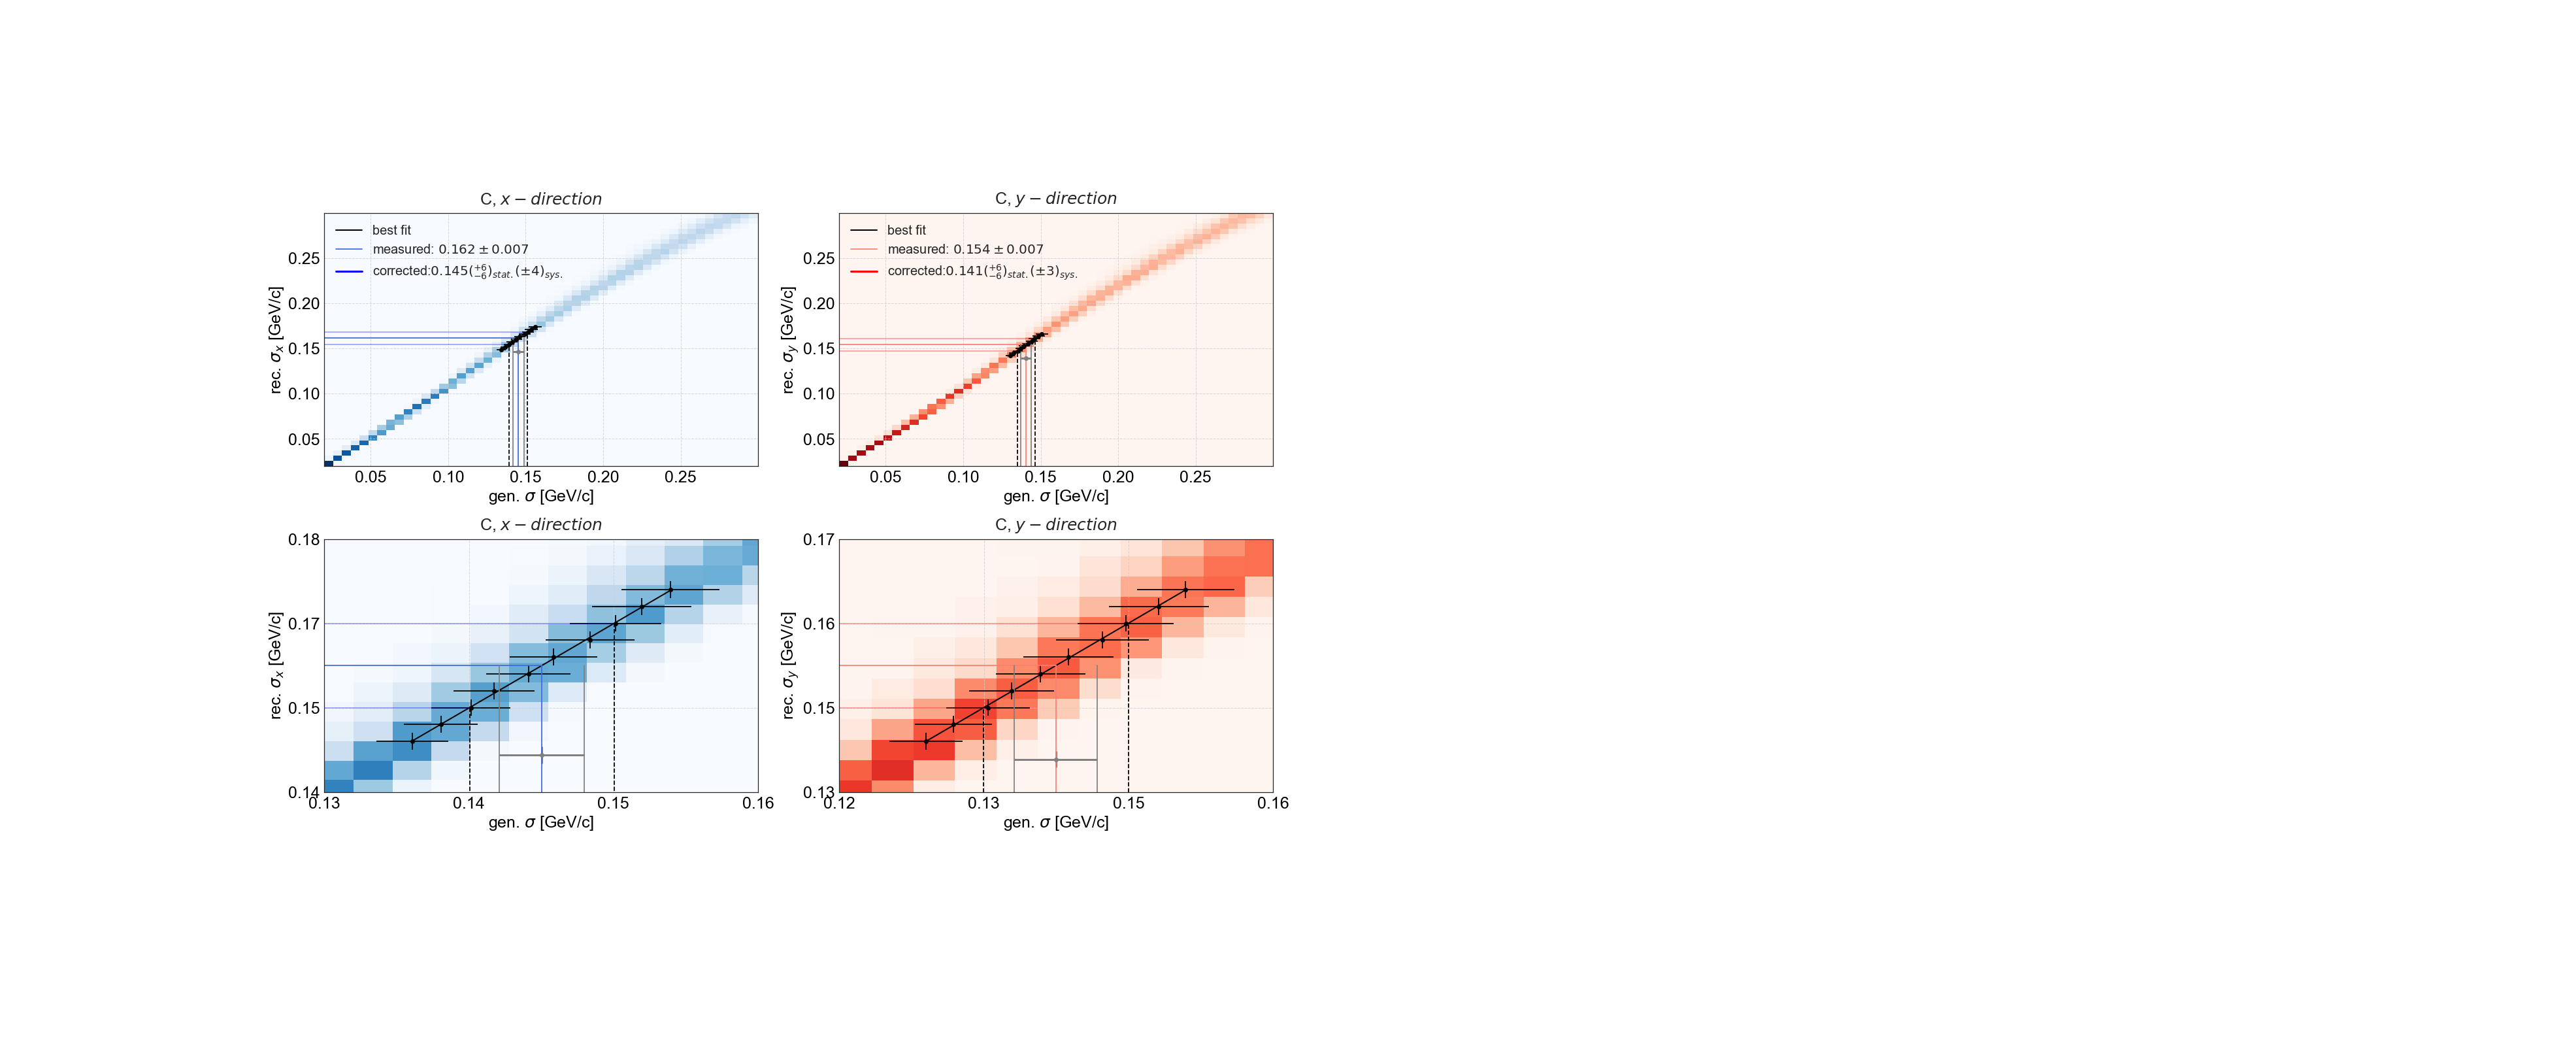

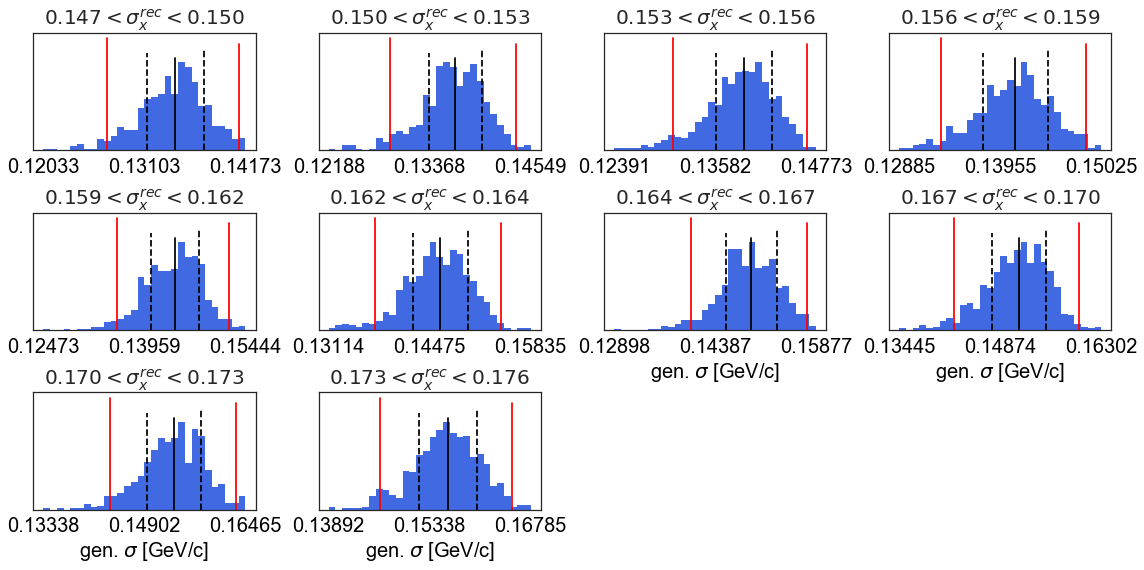

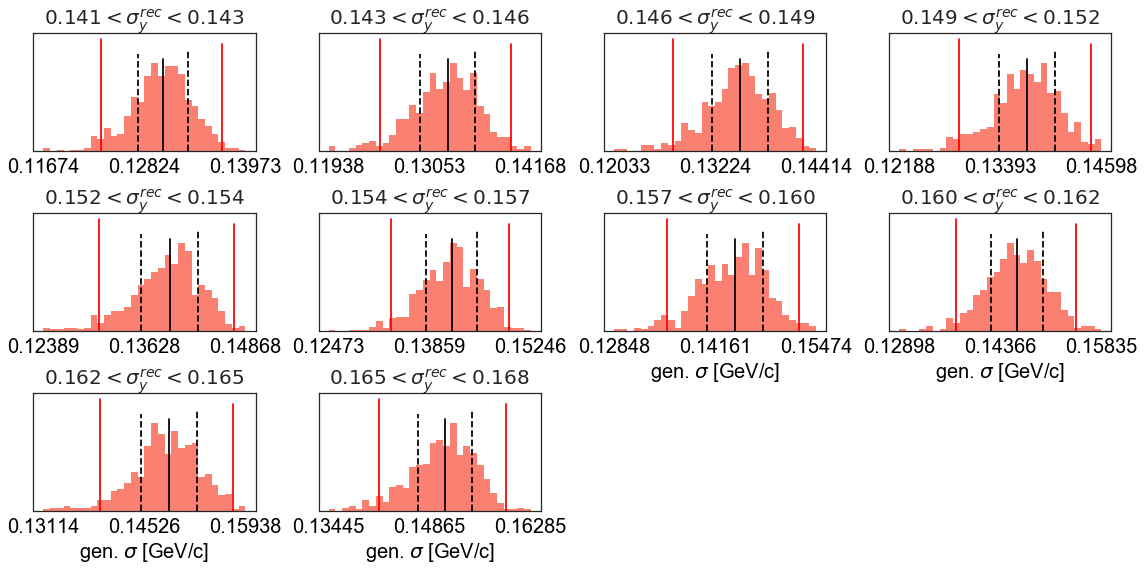

In [20]:
poly_degree = 2 # fit polynomial degree
A = 12
target = 'C'
test_name = "simulations_"+target  
sims=simulation_results[test_name]        
good_results = sims[
            (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
            &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]
fig=plt.figure(figsize=(22,14))
ax=fig.add_subplot(2,2,1)    
x_res = plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=run_name, target=target
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='x'
                                    ,colors=['blue','royalblue','Blues'],debug=0,do_add_1Ddist_in_slices=True)
poly_x , bin_st_gen_mean_x , bin_st_gen_std_x = x_res

ax=fig.add_subplot(2,2,3)    
plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=run_name, target=target
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='x'
                                    ,colors=['blue','royalblue','Blues'],debug=0
                             ,do_zoom_in=True ,do_add_1Ddist_in_slices=False,do_add_legend=False)

ax=fig.add_subplot(2,2,2)
y_res = plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=run_name
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='y'
                                    ,colors=['red','salmon','Reds'],debug=0,do_add_1Ddist_in_slices=True)
poly_y , bin_st_gen_mean_y , bin_st_gen_std_y = y_res


ax=fig.add_subplot(2,2,4)
plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=run_name
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='y'
                                    ,colors=['red','salmon','Reds'],debug=0
                             ,do_zoom_in=True ,do_add_1Ddist_in_slices=False,do_add_legend=False)

fig.subplots_adjust(bottom=-0.5,left=-0.2)
fig.tight_layout() 
filename = figures_path+'St_gen_rec_PseudoData_'+target+'_'+run_name+'.png'
fig.savefig( filename )


# Compute the final $\sigma_t$

In [22]:
extraname = run_name
sample = cm_parameters_with_correction['PrecFiducials']
for direction in ['x','y']:
    sample['sigma_'+direction+extraname+'_final'] = sample['sigma_'+direction+'_corrected'+extraname]
    for updw in ['up','dw']:
        sample['sigma_'+direction+extraname+'_final_'+updw+'_err'] = sample['sigma_'+direction+'_corrected_'+updw+'_err_tot'+extraname]

corr_x = sample['sigma_x_corrected'+extraname]
Dcorr_x = sample['sigma_x_corrected_err_tot'+extraname]

corr_y = sample['sigma_y_corrected'+extraname]
Dcorr_y = sample['sigma_y_corrected_err_tot'+extraname]

# weighted average
corr_t = (corr_x/np.square(Dcorr_x)+corr_y/np.square(Dcorr_y))/( 1./np.square(Dcorr_x) + 1./np.square(Dcorr_y))
sample['sigma_t'+extraname+'_final'] = corr_t
    
Dsys_x = sample['sigma_x_corrected_err_sys'+extraname]
Dsys_y = sample['sigma_y_corrected_err_sys'+extraname]
Dsys_t = 0.5*( Dsys_x + Dsys_y )
sample['sigma_t'+extraname+'_final_err_sys'] = Dsys_t


for updw in ['up','dw']:            
    Dstat_x = sample['sigma_x_corrected_'+updw+'_err_stat'+extraname]
    Dstat_y = sample['sigma_y_corrected_'+updw+'_err_stat'+extraname]
    Dstat_t = np.sqrt(1./( 1./np.square(Dstat_x) + 1./np.square(Dstat_y) ))
    sample['sigma_t'+extraname+'_final_'+updw+'_err_stat'] = Dstat_t

    Dtot_t = np.sqrt( np.square(Dstat_t) + np.square(Dsys_t) )
    sample['sigma_t'+extraname+'_final_'+updw+'_err_tot'] = Dtot_t
    sample['sigma_t'+extraname+'_final_'+updw+'_err'] = Dtot_t

sample['sigma_t_final'] = corr_t
sample['sigma_t_final_err_sys'] = sample['sigma_t'+extraname+'_final_err_sys']

In [24]:
sample['sigma_t_generated'] = 0.143
sample[['sigma_t_generated'
        ,'sigma_t_before_acc_corr','sigma_t_before_acc_corr_err'        
        ,'sigma_t'+extraname+'_final'        
        ,'sigma_t'+extraname+'_final_up_err','sigma_t'+extraname+'_final_dw_err']].astype(float)

,sigma_t_generated,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_trun5_C12_SigmaT0.143_SigmaZ0.150_MeanZ0.110_final,sigma_trun5_C12_SigmaT0.143_SigmaZ0.150_MeanZ0.110_final_up_err,sigma_trun5_C12_SigmaT0.143_SigmaZ0.150_MeanZ0.110_final_dw_err
0,0.143,0.157755,0.004875,0.142736,0.00538,0.005383


# now automize this process
to perform it multiple times and get a bootstrap distribution of the generated vs. reconstructed

In [18]:
poly_x , bin_st_gen_mean_x , bin_st_gen_std_x 

(poly1d([-2.27315273,  1.82059599, -0.05469595]),
 0.1462770641891892,
 0.0036507864340571835)

In [19]:
poly_y , bin_st_gen_mean_y , bin_st_gen_std_y 

(poly1d([-1.34983971,  1.56484327, -0.03902558]),
 0.139491491902834,
 0.0035142026282334112)

In [33]:
sigma_x_PseudoMeasured_array , sigma_x_before_acc_corr_array , sigma_x_after_acc_corr_array = [], [] , []
sigma_y_PseudoMeasured_array , sigma_y_before_acc_corr_array , sigma_y_after_acc_corr_array = [], [] , []
sigma_t_before_acc_corr_array , sigma_t_after_acc_corr_array = [], [] 

PseudoDataPath = "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/PseudoData/C12/"
files_list = os.listdir(PseudoDataPath)
Nfiles = len(files_list)
print 'found %d'%Nfiles,'files'

for i,file_name in enumerate(files_list):
    if i%(Nfiles/10)==0: print '%.1f'%(100*float(i)/Nfiles)+'%'
    rootfilename = file_name[0:-5]

    # post CLAS acceptance 
    ana_sim = TAnalysisEG2(PseudoDataPath , rootfilename )
    reco_parameters = calc_cm_pars_sigma( ana_sim )
    
    # \sigma_x
    sigma_x_PseudoMeasured = float(reco_parameters['sigma_x_unweighted'])
    sigma_x_err_PseudoMeasured = float(reco_parameters['sigma_xErr_unweighted'])
    sigma_x_before_acc_corr = np.sqrt( np.square(sigma_x_PseudoMeasured) - np.square(0.02) )
    Dsigma_x_before_acc_corr = sigma_x_err_PseudoMeasured

    corr_sigma_x =  find_x_poly(poly_x , sigma_x_before_acc_corr)
    x_poly_up_stat = find_x_poly(poly_x,sigma_x_before_acc_corr+Dsigma_x_before_acc_corr)
    x_poly_dw_stat = find_x_poly(poly_x,sigma_x_before_acc_corr-Dsigma_x_before_acc_corr)
    corr_sigma_x_up_err_stat = x_poly_up_stat - corr_sigma_x
    corr_sigma_x_dw_err_stat = corr_sigma_x - x_poly_dw_stat

    corr_sigma_x_err_stat = 0.5*(corr_sigma_x_up_err_stat + corr_sigma_x_dw_err_stat)
    corr_sigma_x_err_sys = bin_st_gen_std_x 
    Dsigma_x_after_acc_corr = np.sqrt(np.square(corr_sigma_x_err_stat) + np.square(corr_sigma_x_err_sys))


    sigma_x_PseudoMeasured_array.append(sigma_x_PseudoMeasured)
    sigma_x_before_acc_corr_array.append(sigma_x_before_acc_corr)
    sigma_x_after_acc_corr_array.append(corr_sigma_x)


    # \sigma_y
    sigma_y_PseudoMeasured = float(reco_parameters['sigma_y_unweighted'])
    sigma_y_err_PseudoMeasured = float(reco_parameters['sigma_yErr_unweighted'])
    sigma_y_before_acc_corr = np.sqrt( np.square(sigma_y_PseudoMeasured) - np.square(0.02) )
    Dsigma_y_before_acc_corr = sigma_y_err_PseudoMeasured

    corr_sigma_y =  find_x_poly(poly_y , sigma_y_before_acc_corr)
    y_poly_up_stat = find_x_poly(poly_y,sigma_y_before_acc_corr+Dsigma_y_before_acc_corr)
    y_poly_dw_stat = find_x_poly(poly_y,sigma_y_before_acc_corr-Dsigma_y_before_acc_corr)
    corr_sigma_y_up_err_stat = y_poly_up_stat - corr_sigma_y
    corr_sigma_y_dw_err_stat = corr_sigma_y - y_poly_dw_stat
    
    corr_sigma_y_err_stat = 0.5*(corr_sigma_y_up_err_stat + corr_sigma_y_dw_err_stat)
    corr_sigma_y_err_sys = bin_st_gen_std_y
    Dsigma_y_after_acc_corr = np.sqrt(np.square(corr_sigma_y_err_stat) + np.square(corr_sigma_y_err_sys))

    sigma_y_PseudoMeasured_array.append(sigma_y_PseudoMeasured)
    sigma_y_before_acc_corr_array.append(sigma_y_before_acc_corr)
    sigma_y_after_acc_corr_array.append(corr_sigma_y)
    
    # \sigma_t
    sigma_t_before_acc_corr = ((sigma_x_before_acc_corr/np.square(Dsigma_x_before_acc_corr)+sigma_y_before_acc_corr/np.square(Dsigma_y_before_acc_corr))
                /( 1./np.square(Dsigma_x_before_acc_corr) + 1./np.square(Dsigma_y_before_acc_corr)))    
    Dsigma_t_before_acc_corr = np.sqrt(1./( 1./np.square(Dsigma_x_before_acc_corr) + 1./np.square(Dsigma_y_before_acc_corr) ))

    sigma_t_after_acc_corr = ((corr_sigma_x/np.square(Dsigma_x_after_acc_corr)+corr_sigma_y/np.square(Dsigma_y_after_acc_corr))
                /( 1./np.square(Dsigma_x_after_acc_corr) + 1./np.square(Dsigma_y_after_acc_corr)))    
    Dsigma_t_after_acc_corr_stat = np.sqrt(1./( 1./np.square(corr_sigma_x_err_stat) + 1./np.square(corr_sigma_y_err_stat) ))
    Dsigma_t_after_acc_corr_sys = 0.5*( corr_sigma_x_err_sys + corr_sigma_y_err_sys )
    Dsigma_t_after_acc_corr = np.sqrt(np.square(Dsigma_t_after_acc_corr_stat) + np.square(Dsigma_t_after_acc_corr_sys))

    sigma_t_before_acc_corr_array.append(sigma_t_before_acc_corr)
    sigma_t_after_acc_corr_array.append(sigma_t_after_acc_corr)


print 'done.'

found 239 files
0.0%
9.6%
19.2%
28.9%
38.5%
48.1%
57.7%
67.4%
77.0%
86.6%
96.2%
done.


saved /Users/erezcohen/Desktop/Projects/2NSRC/InternalReport/Figures/PseudoData/C12_sigma_t_before_after_acc_corr.pdf


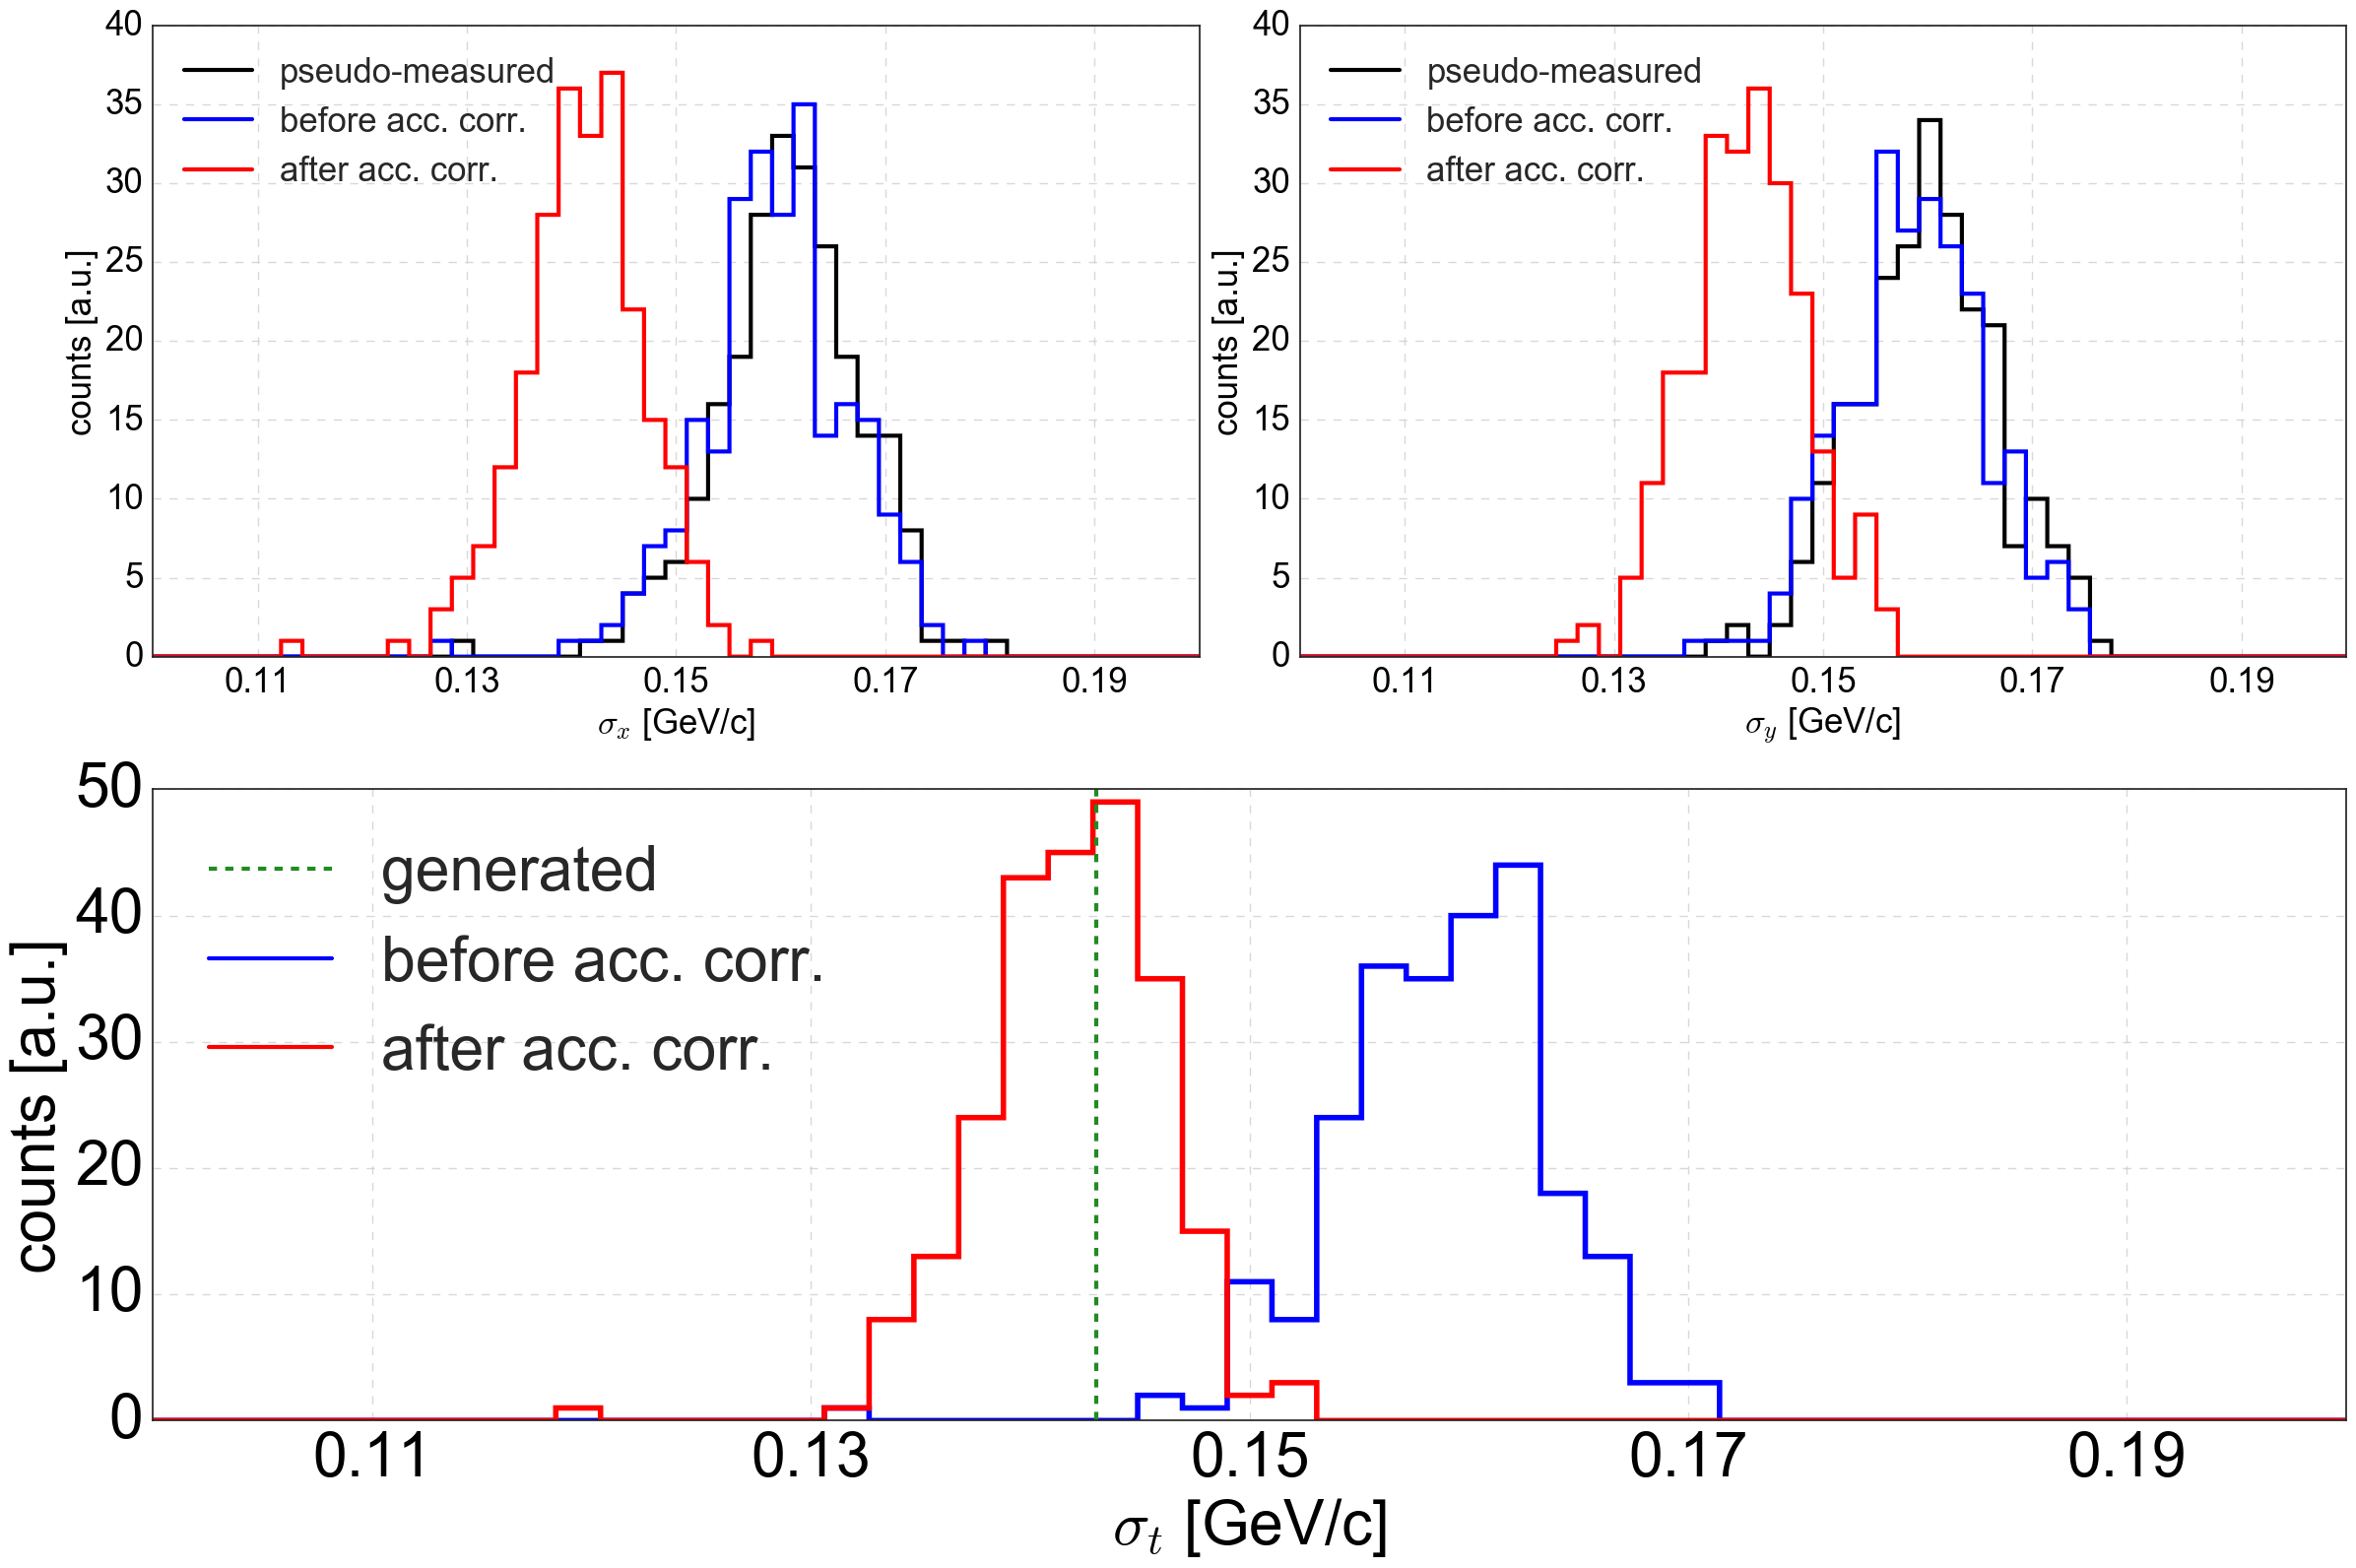

In [35]:
sigma_t_gen = 0.143
target = 'C12'
fig=plt.figure(figsize=(24,16))
bins = np.linspace(0.1,0.2,50)
ax = fig.add_subplot(2,2,1)
for array,label,color in zip([sigma_x_PseudoMeasured_array,sigma_x_before_acc_corr_array,sigma_x_after_acc_corr_array]
                       ,['pseudo-measured','before acc. corr.','after acc. corr.']
                       ,['black','blue','red']):
    plt.hist(array,bins=bins,histtype='step',color=color,linewidth=3)
    plt.plot([0,0],[0,0],color=color,label=label,linewidth=3)
set_axes(ax,r'$\sigma_{x}$ [GeV/c]','counts [a.u.]',legend_loc='upper left',fontsize=25
         ,xlim=(0.1,0.2),xticks=[0.11,0.13,0.15,0.17,0.19]
         ,do_add_legend=True,do_add_grid=True)


ax = fig.add_subplot(2,2,2)
for array,label,color in zip([sigma_y_PseudoMeasured_array,sigma_y_before_acc_corr_array,sigma_y_after_acc_corr_array]
                       ,['pseudo-measured','before acc. corr.','after acc. corr.']
                       ,['black','blue','red']):
    plt.hist(array,bins=bins,histtype='step',color=color,linewidth=3)
    plt.plot([0,0],[0,0],color=color,label=label,linewidth=3)
set_axes(ax,r'$\sigma_{y}$ [GeV/c]','counts [a.u.]',legend_loc='upper left',fontsize=25
         ,xlim=(0.1,0.2),xticks=[0.11,0.13,0.15,0.17,0.19]
         ,do_add_legend=True,do_add_grid=True)


ax = fig.add_subplot(2,2,(3,4))
plt.plot([sigma_t_gen,sigma_t_gen],ax.get_ylim(),'--',color='forestgreen',label='generated',linewidth=3)
for array,label,color in zip([sigma_t_before_acc_corr_array,sigma_t_after_acc_corr_array]
                       ,['before acc. corr.','after acc. corr.']
                       ,['blue','red']):
    plt.hist(array,bins=bins,histtype='step',color=color,linewidth=4)
    plt.plot([0,0],[0,0],color=color,label=label,linewidth=3)
plt.plot([sigma_t_gen,sigma_t_gen],ax.get_ylim(),'--',color='forestgreen',linewidth=3)
set_axes(ax,r'$\sigma_{t}$ [GeV/c]','counts [a.u.]',legend_loc='upper left',fontsize=45
         ,xlim=(0.1,0.2),xticks=[0.11,0.13,0.15,0.17,0.19]
         ,do_add_legend=True,do_add_grid=True)

plt.tight_layout()
filename = figures_path+target+'_sigma_t_before_after_acc_corr.pdf'
plt.savefig(filename)
print 'saved',filename

# Now for $^{208}$Pb

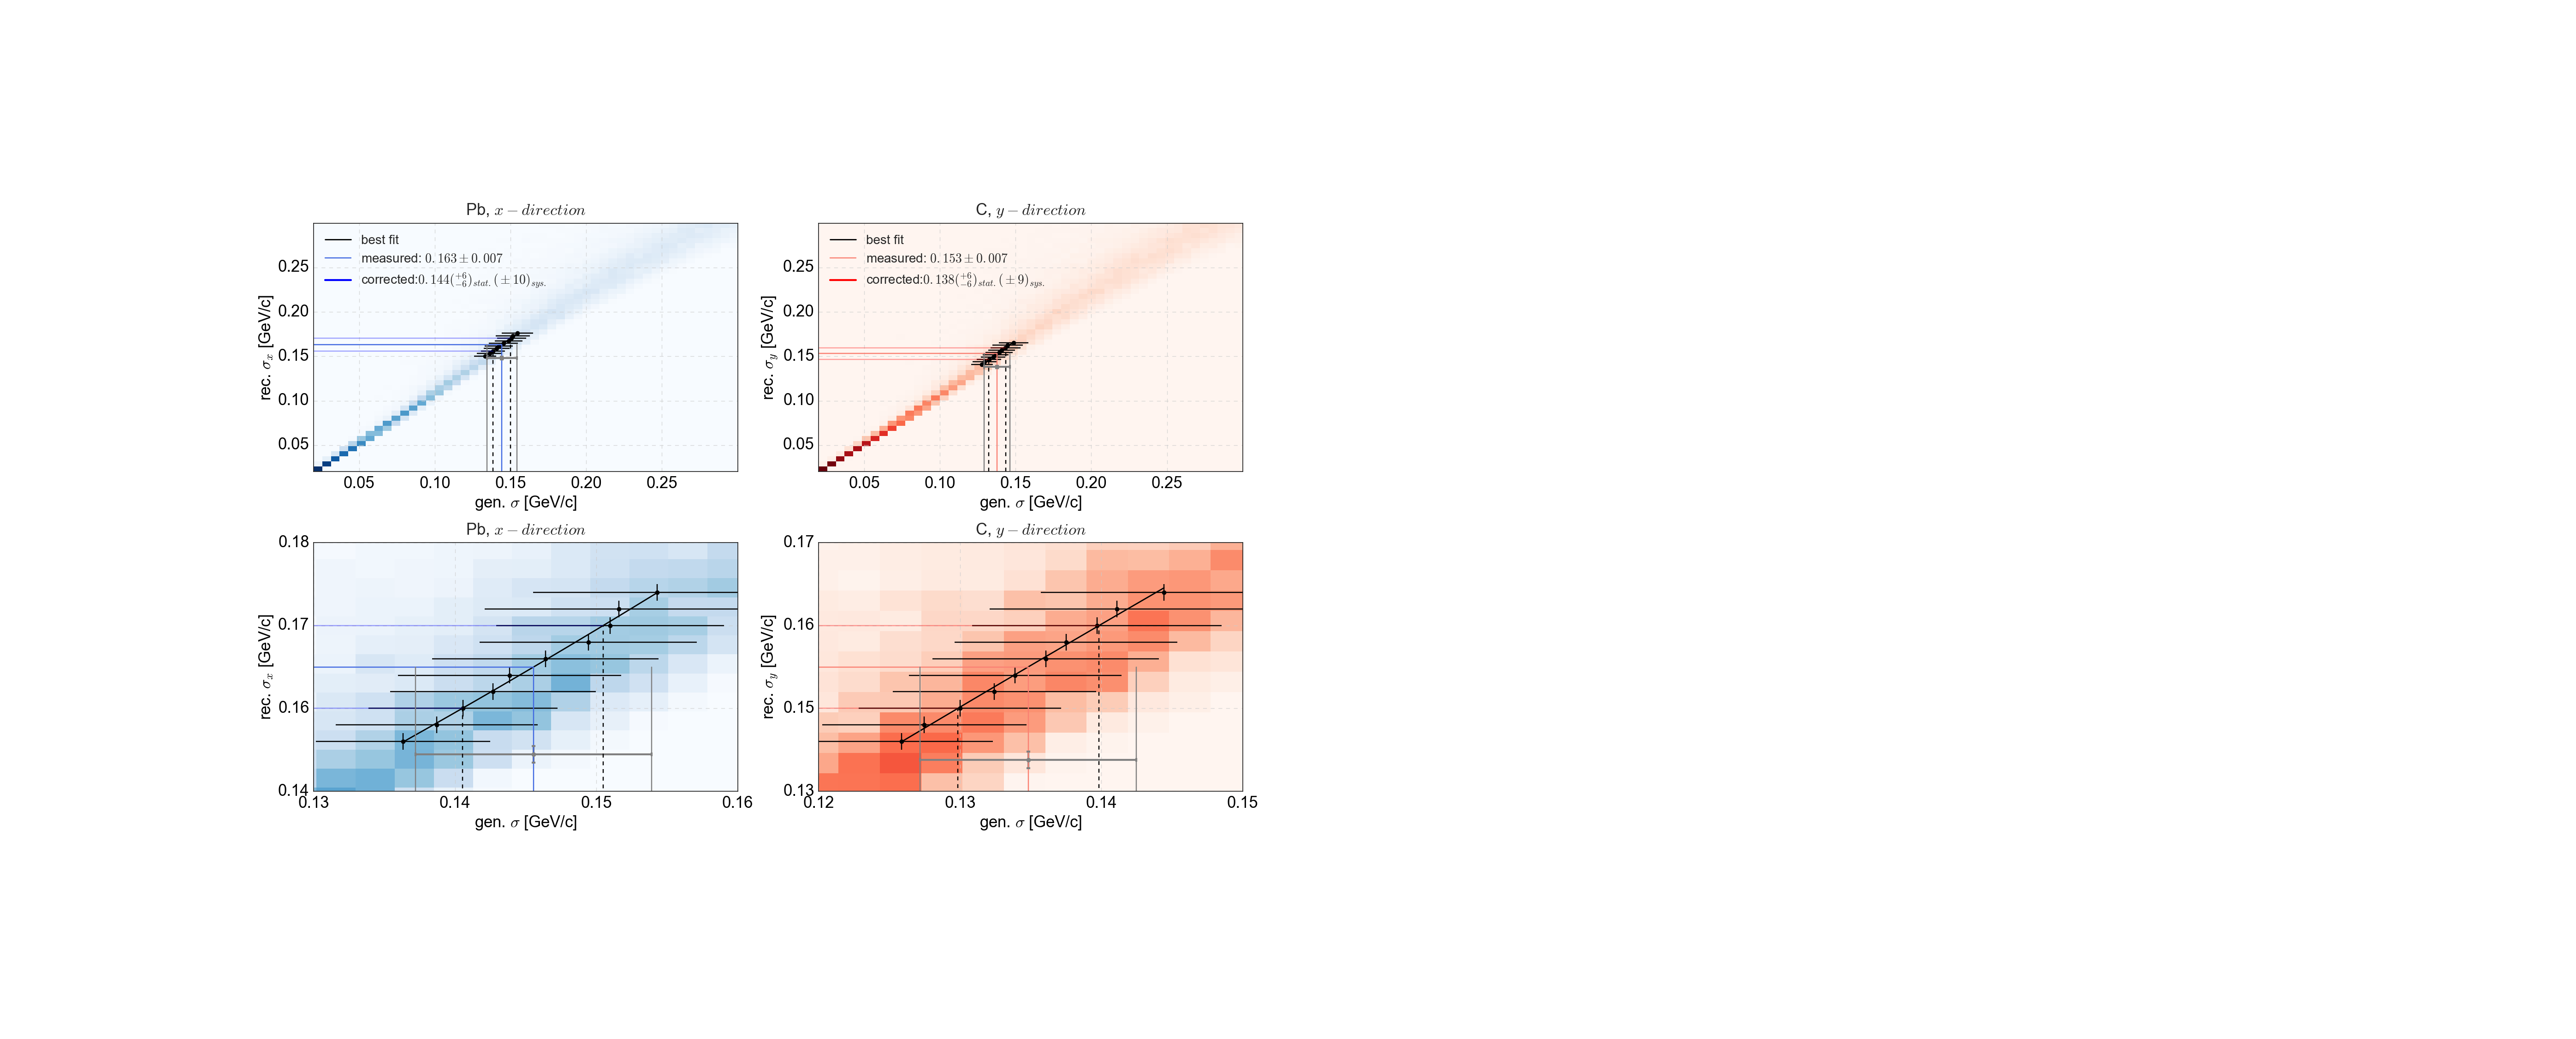

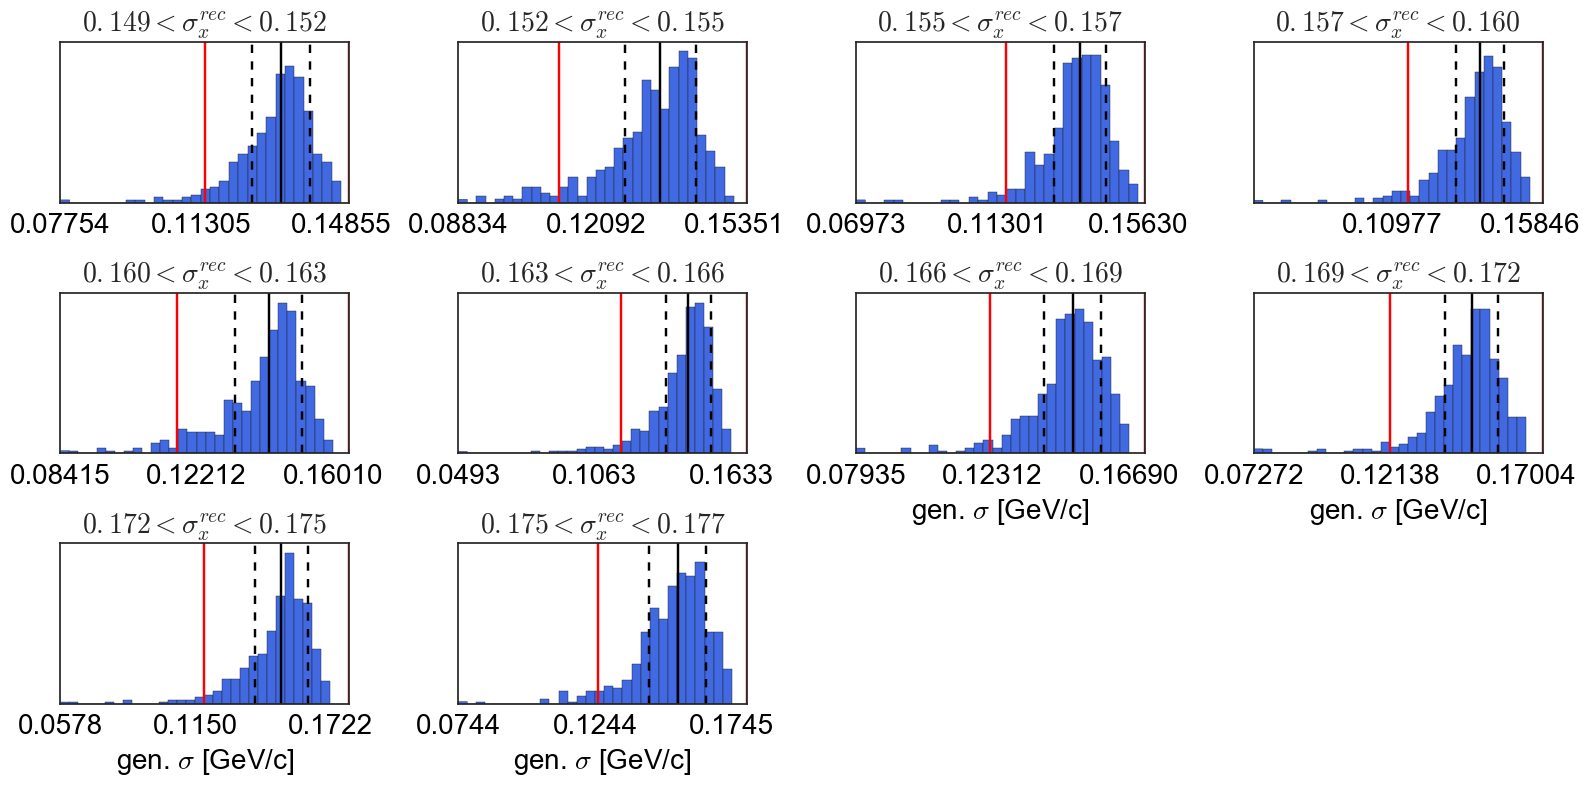

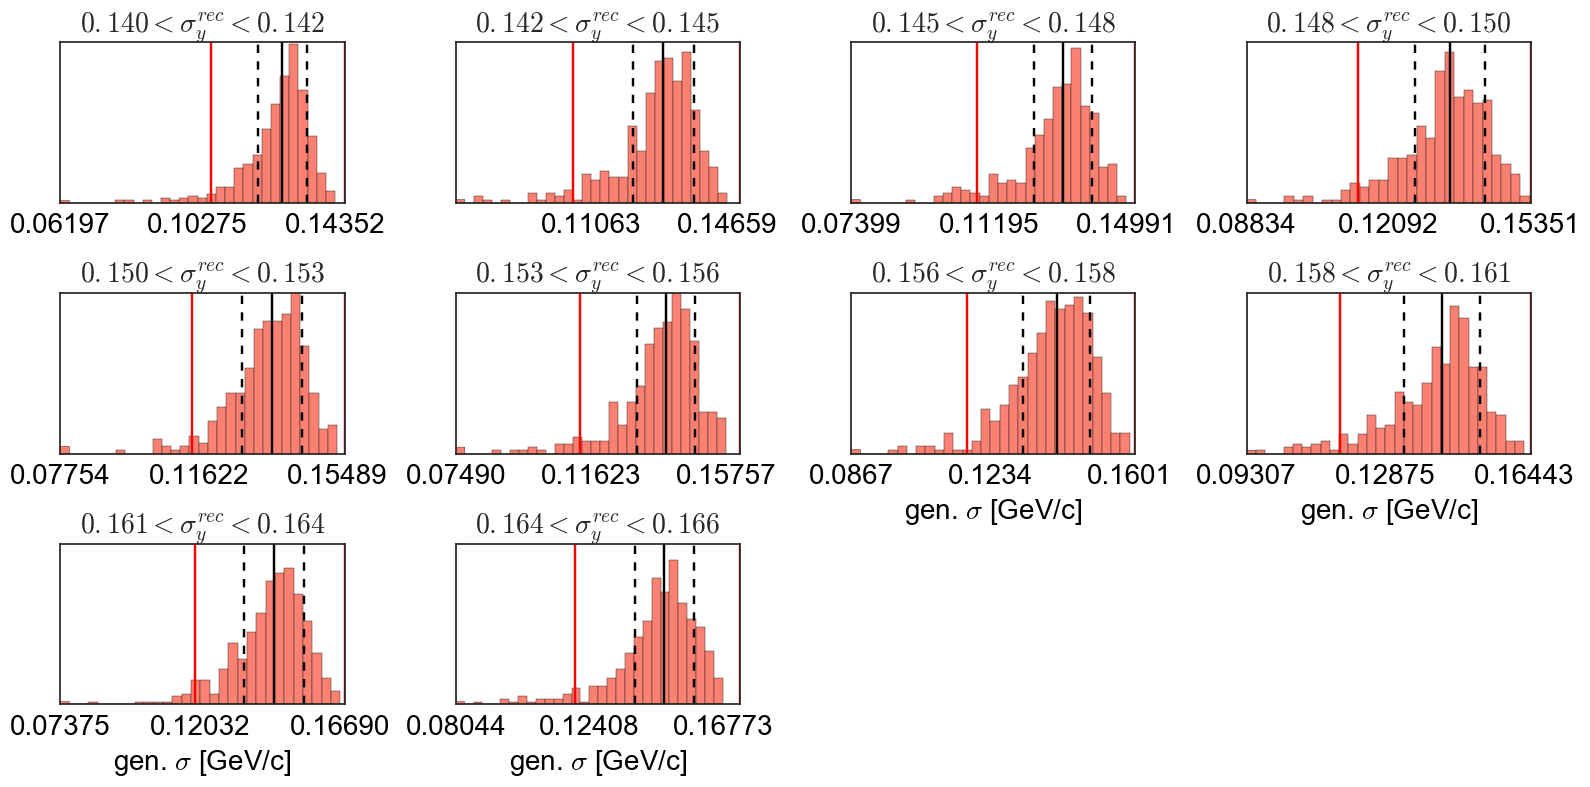

In [22]:
poly_degree = 2 # fit polynomial degree
A = 208
target = 'Pb'
test_name = "simulations_"+target  
sims=simulation_results[test_name]        
good_results = sims[
            (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
            &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]
fig=plt.figure(figsize=(22,14))
ax=fig.add_subplot(2,2,1)    
x_res = plot_cm_direction_binned(sims=good_results, ax=ax,s=3, target=target
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='x'
                                    ,colors=['blue','royalblue','Blues'],debug=0,do_add_1Ddist_in_slices=True)
poly_x , bin_st_gen_mean_x , bin_st_gen_std_x = x_res

ax=fig.add_subplot(2,2,3)    
plot_cm_direction_binned(sims=good_results, ax=ax,s=3, target=target
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='x'
                                    ,colors=['blue','royalblue','Blues'],debug=0
                             ,do_zoom_in=True ,do_add_1Ddist_in_slices=False,do_add_legend=False)

ax=fig.add_subplot(2,2,2)
y_res = plot_cm_direction_binned(sims=good_results, ax=ax,s=3
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='y'
                                    ,colors=['red','salmon','Reds'],debug=0,do_add_1Ddist_in_slices=True)
poly_y , bin_st_gen_mean_y , bin_st_gen_std_y = y_res


ax=fig.add_subplot(2,2,4)
plot_cm_direction_binned(sims=good_results, ax=ax,s=3
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='y'
                                    ,colors=['red','salmon','Reds'],debug=0
                             ,do_zoom_in=True ,do_add_1Ddist_in_slices=False,do_add_legend=False)

fig.subplots_adjust(bottom=-0.5,left=-0.2)
fig.tight_layout() 
filename = figures_path+'St_gen_rec_PseudoData_'+target+'.png' 
fig.savefig( filename )

In [36]:
sigma_x_PseudoMeasured_array , sigma_x_before_acc_corr_array , sigma_x_after_acc_corr_array = [], [] , []
sigma_y_PseudoMeasured_array , sigma_y_before_acc_corr_array , sigma_y_after_acc_corr_array = [], [] , []
sigma_t_before_acc_corr_array , sigma_t_after_acc_corr_array = [], [] 

PseudoDataPath = "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/PseudoData/Pb208/"
files_list = os.listdir(PseudoDataPath)
Nfiles = len(files_list)
print 'found %d'%Nfiles,'files'

for i,file_name in enumerate(files_list):
    if i%(Nfiles/10)==0: print '%.1f'%(100*float(i)/Nfiles)+'%'
    rootfilename = file_name[0:-5]

    # post CLAS acceptance 
    ana_sim = TAnalysisEG2(PseudoDataPath , rootfilename )
    reco_parameters = calc_cm_pars_sigma( ana_sim )
    
    # \sigma_x
    sigma_x_PseudoMeasured = float(reco_parameters['sigma_x_unweighted'])
    sigma_x_err_PseudoMeasured = float(reco_parameters['sigma_xErr_unweighted'])
    sigma_x_before_acc_corr = np.sqrt( np.square(sigma_x_PseudoMeasured) - np.square(0.02) )
    Dsigma_x_before_acc_corr = sigma_x_err_PseudoMeasured

    corr_sigma_x =  find_x_poly(poly_x , sigma_x_before_acc_corr)
    x_poly_up_stat = find_x_poly(poly_x,sigma_x_before_acc_corr+Dsigma_x_before_acc_corr)
    x_poly_dw_stat = find_x_poly(poly_x,sigma_x_before_acc_corr-Dsigma_x_before_acc_corr)
    corr_sigma_x_up_err_stat = x_poly_up_stat - corr_sigma_x
    corr_sigma_x_dw_err_stat = corr_sigma_x - x_poly_dw_stat

    corr_sigma_x_err_stat = 0.5*(corr_sigma_x_up_err_stat + corr_sigma_x_dw_err_stat)
    corr_sigma_x_err_sys = bin_st_gen_std_x 
    Dsigma_x_after_acc_corr = np.sqrt(np.square(corr_sigma_x_err_stat) + np.square(corr_sigma_x_err_sys))


    sigma_x_PseudoMeasured_array.append(sigma_x_PseudoMeasured)
    sigma_x_before_acc_corr_array.append(sigma_x_before_acc_corr)
    sigma_x_after_acc_corr_array.append(corr_sigma_x)


    # \sigma_y
    sigma_y_PseudoMeasured = float(reco_parameters['sigma_y_unweighted'])
    sigma_y_err_PseudoMeasured = float(reco_parameters['sigma_yErr_unweighted'])
    sigma_y_before_acc_corr = np.sqrt( np.square(sigma_y_PseudoMeasured) - np.square(0.02) )
    Dsigma_y_before_acc_corr = sigma_y_err_PseudoMeasured
                
    corr_sigma_y =  find_x_poly(poly_y , sigma_y_before_acc_corr)
    y_poly_up_stat = find_x_poly(poly_y,sigma_y_before_acc_corr+Dsigma_y_before_acc_corr)
    y_poly_dw_stat = find_x_poly(poly_y,sigma_y_before_acc_corr-Dsigma_y_before_acc_corr)
    corr_sigma_y_up_err_stat = y_poly_up_stat - corr_sigma_y
    corr_sigma_y_dw_err_stat = corr_sigma_y - y_poly_dw_stat
    
    corr_sigma_y_err_stat = 0.5*(corr_sigma_y_up_err_stat + corr_sigma_y_dw_err_stat)
    corr_sigma_y_err_sys = bin_st_gen_std_y
    Dsigma_y_after_acc_corr = np.sqrt(np.square(corr_sigma_y_err_stat) + np.square(corr_sigma_y_err_sys))

    sigma_y_PseudoMeasured_array.append(sigma_y_PseudoMeasured)
    sigma_y_before_acc_corr_array.append(sigma_y_before_acc_corr)
    sigma_y_after_acc_corr_array.append(corr_sigma_y)
    
    # \sigma_t
    sigma_t_before_acc_corr = ((sigma_x_before_acc_corr/np.square(Dsigma_x_before_acc_corr)+sigma_y_before_acc_corr/np.square(Dsigma_y_before_acc_corr))
                /( 1./np.square(Dsigma_x_before_acc_corr) + 1./np.square(Dsigma_y_before_acc_corr)))    
    Dsigma_t_before_acc_corr = np.sqrt(1./( 1./np.square(Dsigma_x_before_acc_corr) + 1./np.square(Dsigma_y_before_acc_corr) ))

    sigma_t_after_acc_corr = ((corr_sigma_x/np.square(Dsigma_x_after_acc_corr)+corr_sigma_y/np.square(Dsigma_y_after_acc_corr))
                /( 1./np.square(Dsigma_x_after_acc_corr) + 1./np.square(Dsigma_y_after_acc_corr)))    
    Dsigma_t_after_acc_corr_stat = np.sqrt(1./( 1./np.square(corr_sigma_x_err_stat) + 1./np.square(corr_sigma_y_err_stat) ))
    Dsigma_t_after_acc_corr_sys = 0.5*( corr_sigma_x_err_sys + corr_sigma_y_err_sys )
    Dsigma_t_after_acc_corr = np.sqrt(np.square(Dsigma_t_after_acc_corr_stat) + np.square(Dsigma_t_after_acc_corr_sys))

    sigma_t_before_acc_corr_array.append(sigma_t_before_acc_corr)
    sigma_t_after_acc_corr_array.append(sigma_t_after_acc_corr)

    ana_sim.CloseFile()

print 'done.'

found 968 files
0.0%
9.9%
19.8%
29.8%
39.7%
49.6%
59.5%
69.4%
79.3%
89.3%
99.2%
done.


saved /Users/erezcohen/Desktop/Projects/2NSRC/InternalReport/Figures/PseudoData/Pb208_sigma_t_before_after_acc_corr.pdf


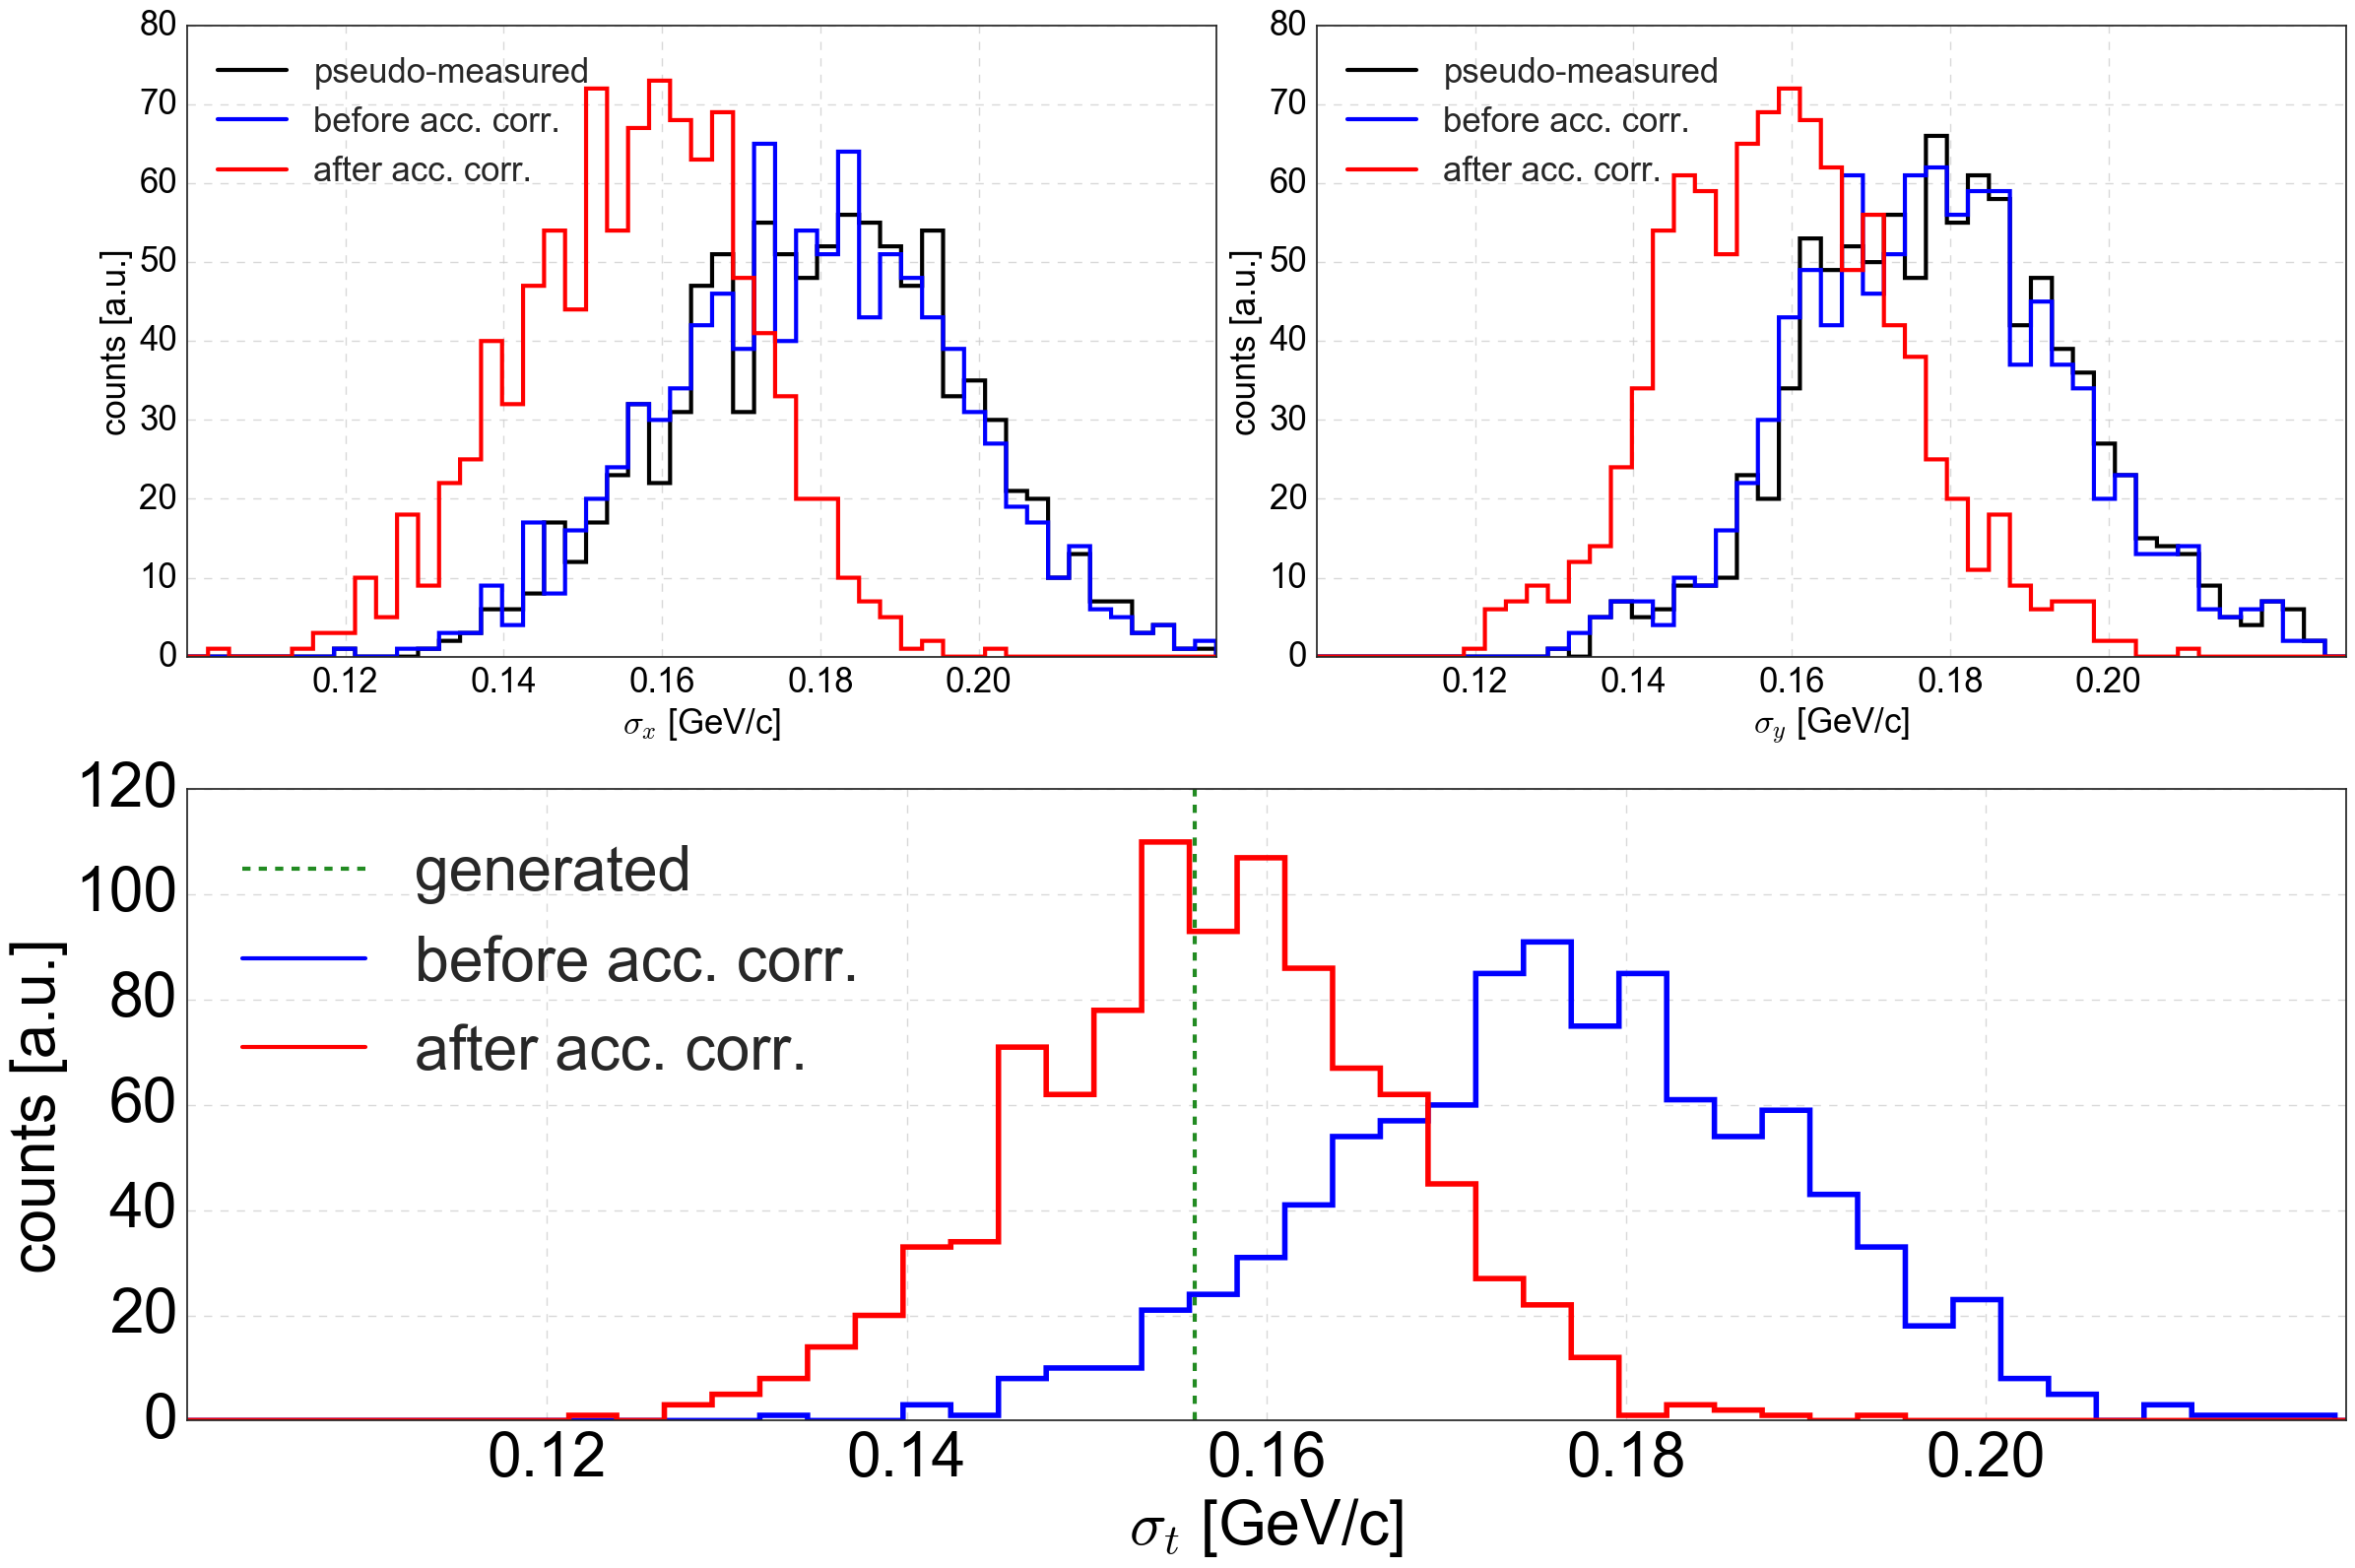

In [37]:
sigma_t_gen = 0.156
target = 'Pb208'
fig=plt.figure(figsize=(24,16))
bins = np.linspace(0.1,0.23,50)
ax = fig.add_subplot(2,2,1)
for array,label,color in zip([sigma_x_PseudoMeasured_array,sigma_x_before_acc_corr_array,sigma_x_after_acc_corr_array]
                       ,['pseudo-measured','before acc. corr.','after acc. corr.']
                       ,['black','blue','red']):
    plt.hist(array,bins=bins,histtype='step',color=color,linewidth=3)
    plt.plot([0,0],[0,0],color=color,label=label,linewidth=3)
set_axes(ax,r'$\sigma_{x}$ [GeV/c]','counts [a.u.]',legend_loc='upper left',fontsize=25
         ,xlim=(0.1,0.23),xticks=[0.12,0.14,0.16,0.18,0.2]
         ,do_add_legend=True,do_add_grid=True)


ax = fig.add_subplot(2,2,2)
for array,label,color in zip([sigma_y_PseudoMeasured_array,sigma_y_before_acc_corr_array,sigma_y_after_acc_corr_array]
                       ,['pseudo-measured','before acc. corr.','after acc. corr.']
                       ,['black','blue','red']):
    plt.hist(array,bins=bins,histtype='step',color=color,linewidth=3)
    plt.plot([0,0],[0,0],color=color,label=label,linewidth=3)
set_axes(ax,r'$\sigma_{y}$ [GeV/c]','counts [a.u.]',legend_loc='upper left',fontsize=25
         ,xlim=(0.1,0.23),xticks=[0.12,0.14,0.16,0.18,0.2]
         ,do_add_legend=True,do_add_grid=True)


ax = fig.add_subplot(2,2,(3,4))
plt.plot([sigma_t_gen,sigma_t_gen],ax.get_ylim(),'--',color='forestgreen',label='generated',linewidth=3)
for array,label,color in zip([sigma_t_before_acc_corr_array,sigma_t_after_acc_corr_array]
                       ,['before acc. corr.','after acc. corr.']
                       ,['blue','red']):
    plt.hist(array,bins=bins,histtype='step',color=color,linewidth=4)
    plt.plot([0,0],[0,0],color=color,label=label,linewidth=3)
plt.plot([sigma_t_gen,sigma_t_gen],ax.get_ylim(),'--',color='forestgreen',linewidth=3)
set_axes(ax,r'$\sigma_{t}$ [GeV/c]','counts [a.u.]',legend_loc='upper left',fontsize=45
         ,xlim=(0.1,0.22),xticks=[0.12,0.14,0.16,0.18,0.2]
         ,do_add_legend=True,do_add_grid=True)

plt.tight_layout()
filename = figures_path+target+'_sigma_t_before_after_acc_corr.pdf'
plt.savefig(filename)
print 'saved',filename